In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Loading data set file in to the data frame
loan_df = pd.read_csv("D:\LendingClubCaseStudy\loan.csv")
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
# Finding shape of Data Frame
loan_df.shape

(39717, 111)

In [4]:
#Checking For null values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# How much percentage of null values is present in the data
null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
null_perc[ null_perc > 0 ]

#Printing columns Greater than 0%
loan_df.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)


In [6]:
#Sorting the Unique values for Data Understanding
loan_df.nunique().sort_values().head(15)


tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [7]:
#Dropping columns with single values that is of no use
loan_df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)
#Printing high unique value columns for data understanding
loan_df.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

In [8]:
#emp_title, and title these two columns are having text values so need to remove that as it is of no use
loan_df.drop(['emp_title', 'title'], axis=1, inplace=True)
#id, url, and member_id we will take id as PK and we will remove the ither two columns mentioned
loan_df.drop(['member_id', 'url'], axis=1, inplace=True)

In [9]:
#These columns already took the loan as we are now dealing with new loan applications we dont need this columns anymore
loan_df.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
loan_df.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [10]:
#Analyzing the percentage of missing values 
null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [11]:
#Removing null values in the above columns
loan_df.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#checking if there any null values
null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [12]:
#as we are dealing with only current loan status we can remove the remaining columns(Fully paid and Charged off)
loan_df = loan_df[loan_df.loan_status != 'Current']


In [13]:
loan_df.term.unique() # Checking for any Unique values and removing null spaces in the column term
loan_df['term'] = loan_df.term.str.strip()
loan_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [14]:
loan_df.shape # Checking the shape after removing the unncessary colums or null columns

(36800, 31)

In [15]:
loan_df.dtypes #checking datatype whether it is in correct format or format need to be changed 

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

In [16]:
#int_rate and revol_util these two colums is having % symbol and it is in object type lets convert into float for better use
loan_df['int_rate'] = loan_df.int_rate.str.strip('%').astype(float)
loan_df['revol_util'] = loan_df.revol_util.str.strip('%').astype(float)

In [17]:
#issue_d, earliest_cr_line need to convert to date type to date
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [18]:
loan_df.dtypes #checking what data type our columns is in for better analysis

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [19]:
#issue_d column
loan_df['issue_d_year'] = loan_df.issue_d.dt.year
loan_df['issue_d_month'] = loan_df.issue_d.dt.strftime('%b')
loan_df['issue_d_weekday'] = loan_df.issue_d.dt.weekday
#data type conversion of year and weekday
loan_df['issue_d_year'] = loan_df['issue_d_year'].astype(object)
loan_df['issue_d_weekday'] = loan_df['issue_d_weekday'].astype(object)

#earliest_cr_line
loan_df['earliest_cr_line_year'] = loan_df.earliest_cr_line.dt.year
loan_df['earliest_cr_line_month'] = loan_df.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line_year'].astype(object)

In [20]:
#Rounding and converting the funded_amnt_inv to  approved_loan_amnt_ratio for analysis
loan_df['approved_loan_amnt_ratio'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)


In [21]:
loan_df.head(10) # loading the data 

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0   1077501       5000         5000           4975.0  36 months     10.65   
1   1077430       2500         2500           2500.0  60 months     15.27   
2   1077175       2400         2400           2400.0  36 months     15.96   
3   1076863      10000        10000          10000.0  36 months     13.49   
5   1075269       5000         5000           5000.0  36 months      7.90   
6   1069639       7000         7000           7000.0  60 months     15.96   
7   1072053       3000         3000           3000.0  36 months     18.64   
8   1071795       5600         5600           5600.0  60 months     21.28   
9   1071570       5375         5375           5350.0  60 months     12.69   
10  1070078       6500         6500           6500.0  60 months     14.65   

    installment grade sub_grade emp_length  ...   total_pymnt  \
0        162.87     B        B2  10+ years  ...   5863.155187   
1         59.83     C        C4   < 1 year  ...   1008.710000   
2         84.33     C        C5  10+ years  ...   3005.666844   
3        339.31     C        C1  10+ years  ...  12231.890000   
5        156.46     A        A4    3 years  ...   5632.210000   
6        170.08     C        C5    8 years  ...  10110.840000   
7        109.43     E        E1    9 years  ...   3939.135294   
8        152.39     F        F2    4 years  ...    646.020000   
9        121.45     B        B5   < 1 year  ...   1476.190000   
10       153.45     C        C3    5 years  ...   7678.017673   

    total_pymnt_inv last_pymnt_amnt pub_rec_bankruptcies issue_d_year  \
0           5833.84          171.62                  0.0         2011   
1           1008.71          119.66                  0.0         2011   
2           3005.67          649.91                  0.0         2011   
3          12231.89          357.48                  0.0         2011   
5           5632.21          161.03                  0.0         2011   
6          10110.84         1313.76                  0.0         2011   
7           3939.14          111.34                  0.0         2011   
8            646.02          152.39                  0.0         2011   
9           1469.34          121.45                  0.0         2011   
10          7678.02         1655.54                  0.0         2011   

   issue_d_month issue_d_weekday earliest_cr_line_year  \
0            Dec               3                  1985   
1            Dec               3                  1999   
2            Dec               3                  2001   
3            Dec               3                  1996   
5            Dec               3                  2004   
6            Dec               3                  2005   
7            Dec               3                  2007   
8            Dec               3                  2004   
9            Dec               3                  2004   
10           Dec               3                  1998   

    earliest_cr_line_month  approved_loan_amnt_ratio  
0                      Jan                     99.50  
1                      Apr                    100.00  
2                      Nov                    100.00  
3                      Feb                    100.00  
5                      Nov                    100.00  
6                      Jul                    100.00  
7                      Jan                    100.00  
8                      Apr                    100.00  
9                      Sep                     99.53  
10                     Jan                    100.00  

[10 rows x 37 columns]

In [22]:
loan_df.shape #Checking the shape after removing some columns

(36800, 37)

In [23]:
loan_df.dtypes #checking the column data types

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

# Univariate analysis


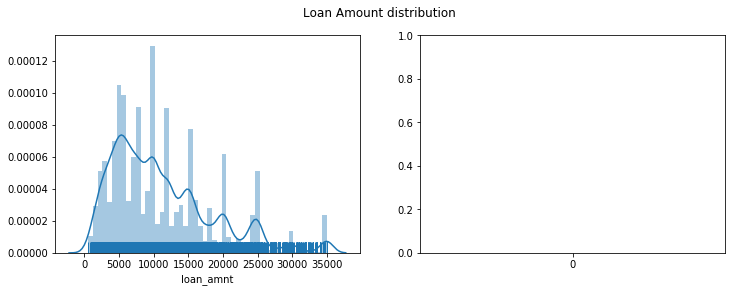

In [26]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=loan_df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(loan_df=loan_df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [27]:
#Converting into Percentage for better understanding
loan_df.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
#OBS:From the plots, most people took loan amount of 10000, and also meadian of distribution is 10000.less people took more than 30000.

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

funded_amnt

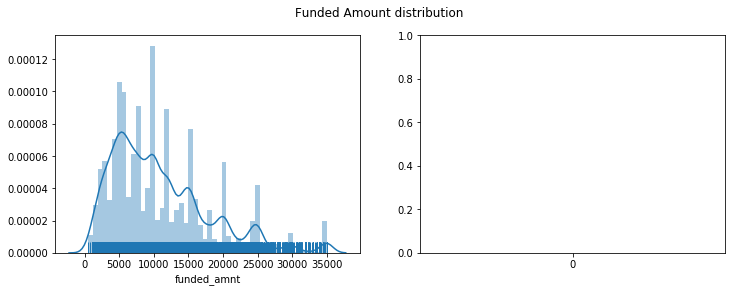

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(loan_df=loan_df.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [29]:
loan_df.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
#OBS : Similar to Loanamount

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20375.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

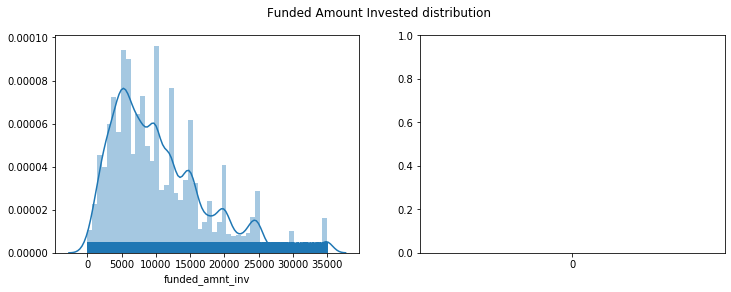

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(loan_df=loan_df.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [31]:
loan_df.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
# OBS : Similar to Loan amount

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
5%        2000.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
90%      20000.000000
95%      24655.816803
99%      34725.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

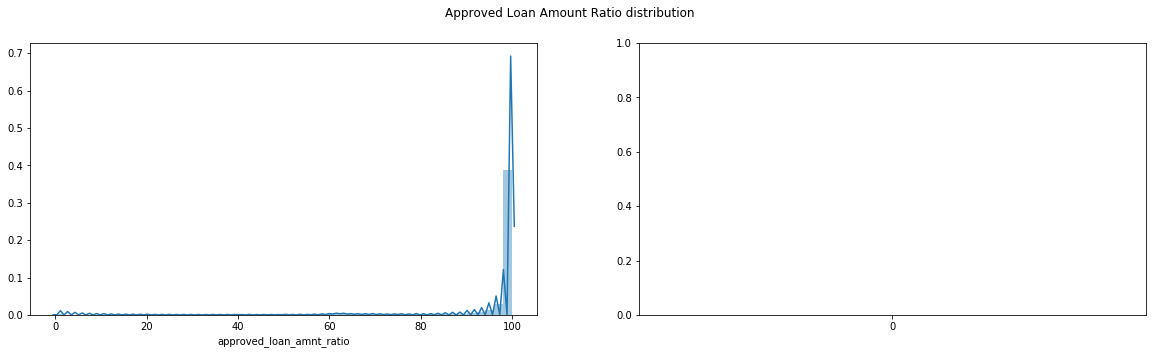

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(loan_df=loan_df.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()
# OBS : 70per got Approved Loan amount ratio

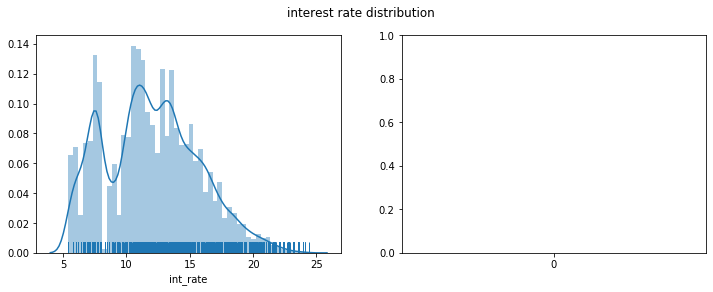

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(loan_df=loan_df.int_rate)
plt.suptitle('interest rate distribution')
plt.show() 
# OBS : most intrest lies between 9 to 14 and some people took intrest rate at 22 too

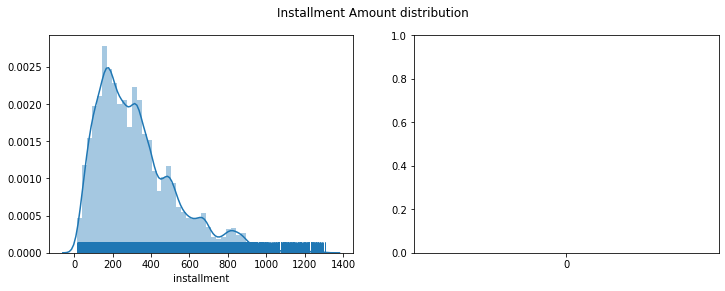

In [34]:
installment = loan_df.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(loan_df=installment)
plt.suptitle('Installment Amount distribution')
plt.show()
#OBS : Installment rate is around 250

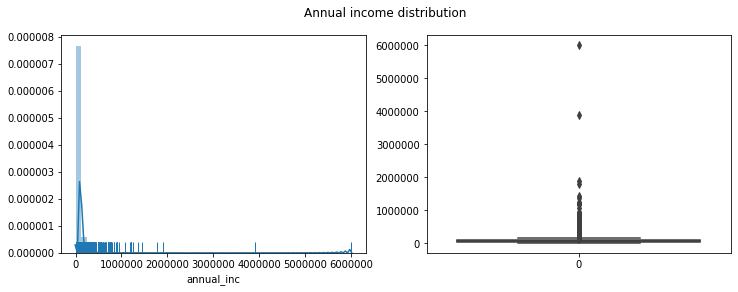

In [35]:
var1 = loan_df.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()
# OBS : Around 350 people are having more the 235000 and 99% of people are having incomes below 235000.

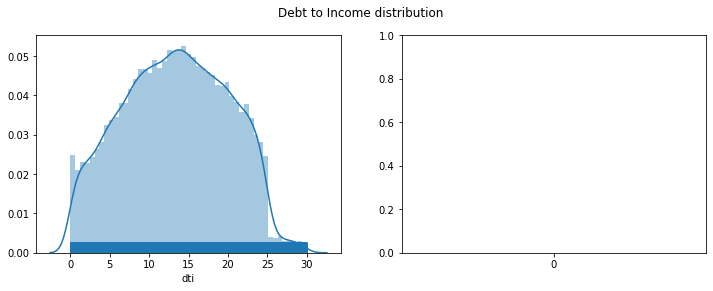

In [36]:
var1 = loan_df.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(loan_df=var1)
plt.suptitle('Debt to Income distribution')
plt.show()
# OBS : barrower who have Debt to Income ration less than 30.

Text(0.5, 1.0, 'pub_rec Distribution')

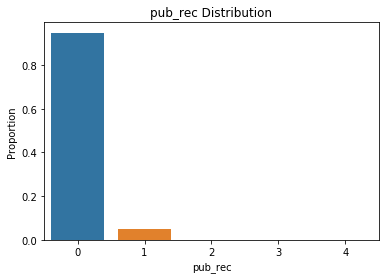

In [37]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

pub_rec_bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

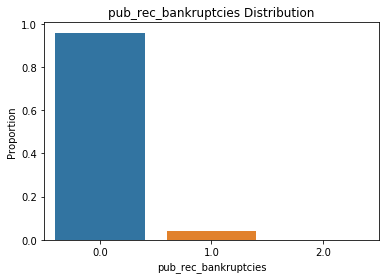

In [38]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
# OBS : 99% people have not went bankrupt.

Loan issue date (issue_d)


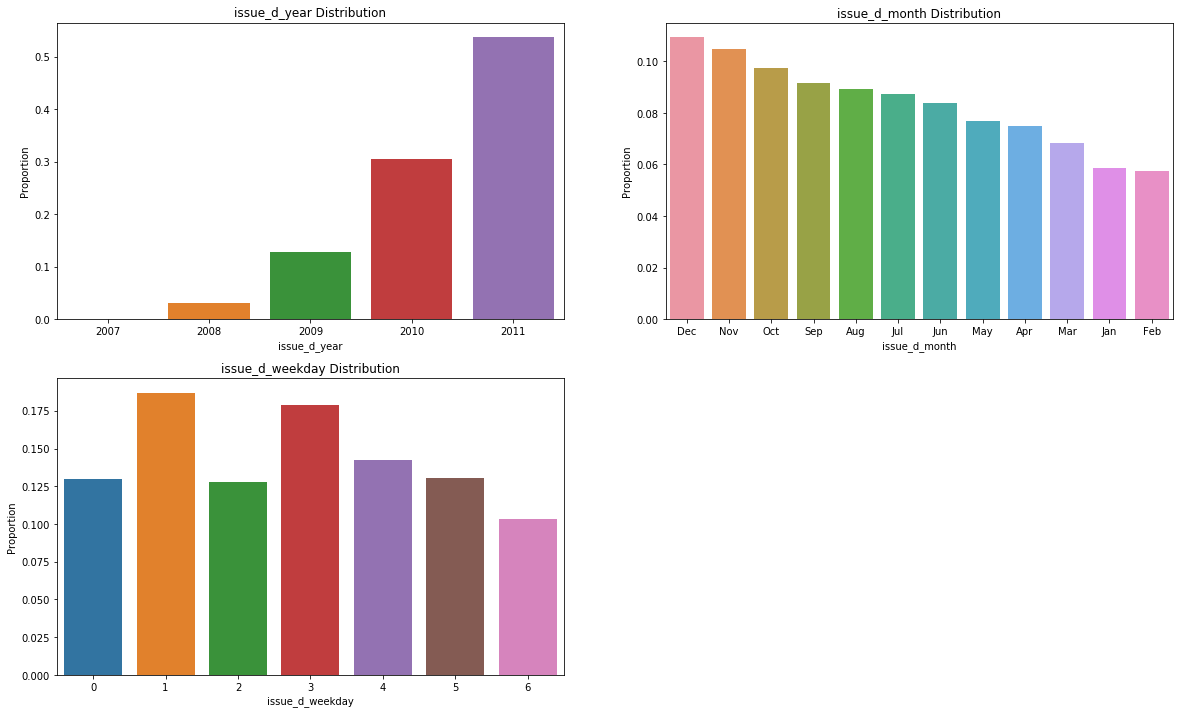

In [39]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

earliest_cr_line


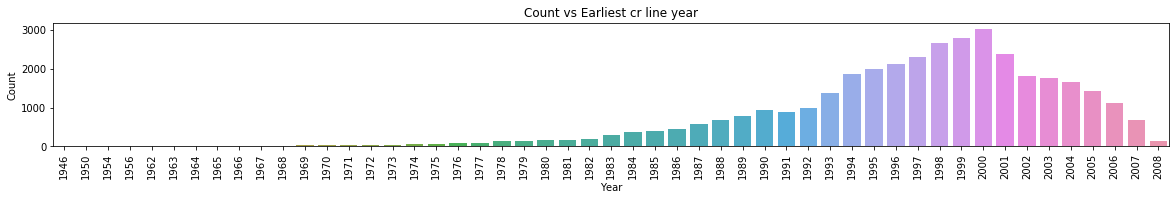

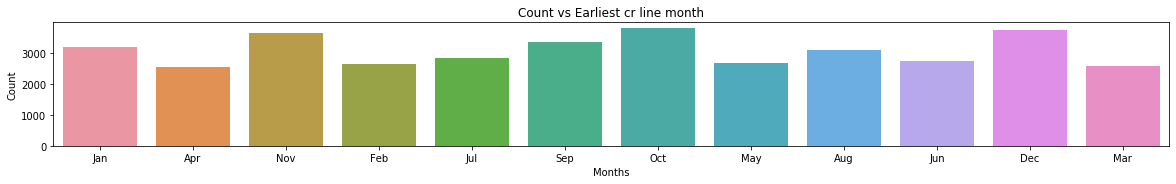

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(loan_df.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(loan_df.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

# OBS : Most have got credit line at the end of the year

Term

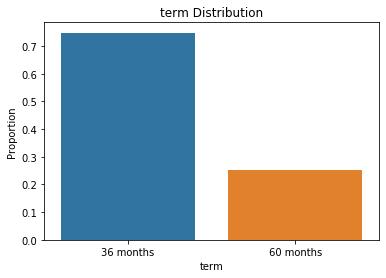

In [41]:
var = 'term'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

In [ ]:
Observation :Borrower Preferred 36 months than taking 60 months.

Grade

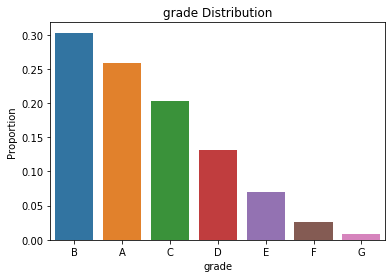

In [42]:
var = 'grade'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()
# OBS : Most Borrower preferred A and B 

Sub Grade

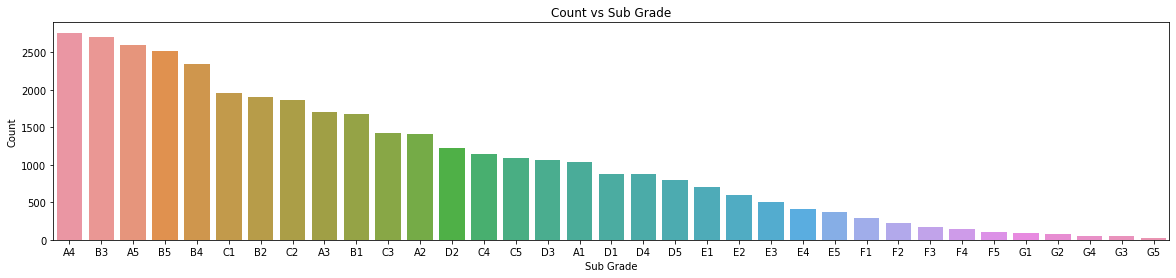

In [43]:
plt.figure(figsize=(20,4))
sns.countplot(loan_df.sub_grade, order=loan_df.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

Employment Length

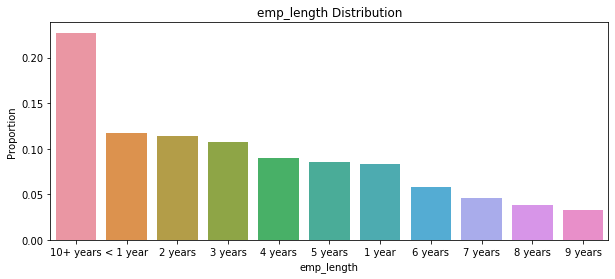

In [46]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()
# OBS : 10+years employees are taken loans mostly

Home Ownership

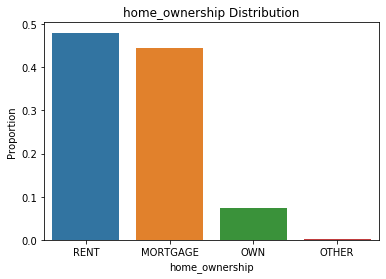

In [47]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()
# OBS : Rent and Mortage are taking most loans 

Verification Status

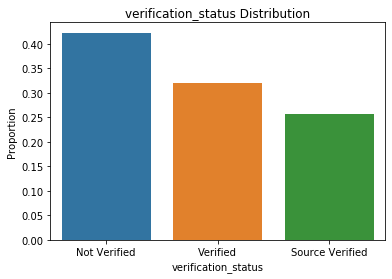

In [48]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

# OBS : Not Verified is having the most of the loans 

Loan Status

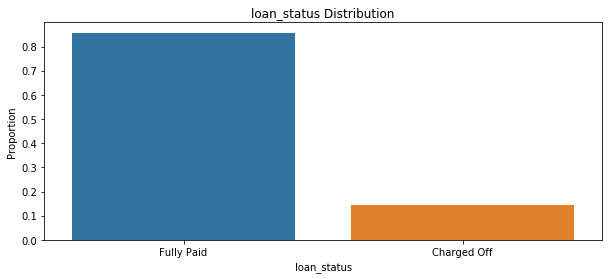

In [49]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

# OBS : around 85per paid fully and rest is charged off

Purpose

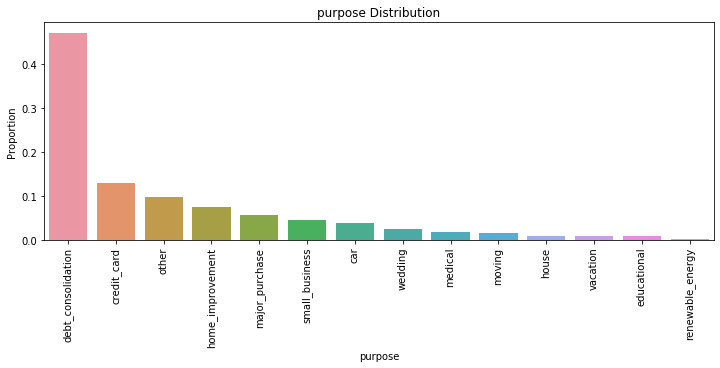

In [50]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

# More people has taken loans for debt_consolidation

Borrower's State (add_state)

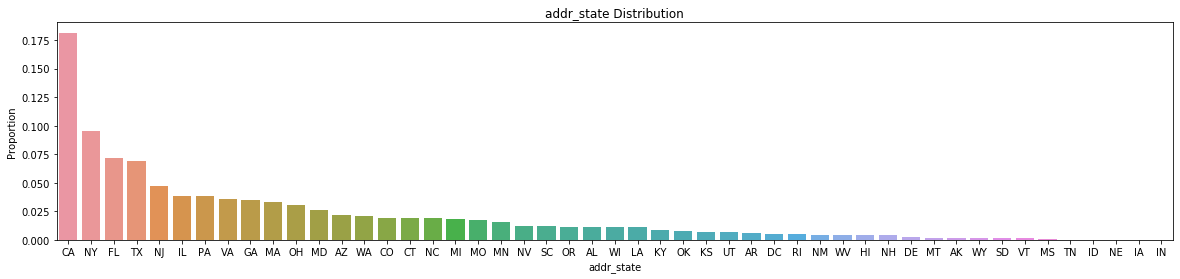

In [51]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

# most people are from CA and NY

# Segmented Univariate Analysis

Loan Amount

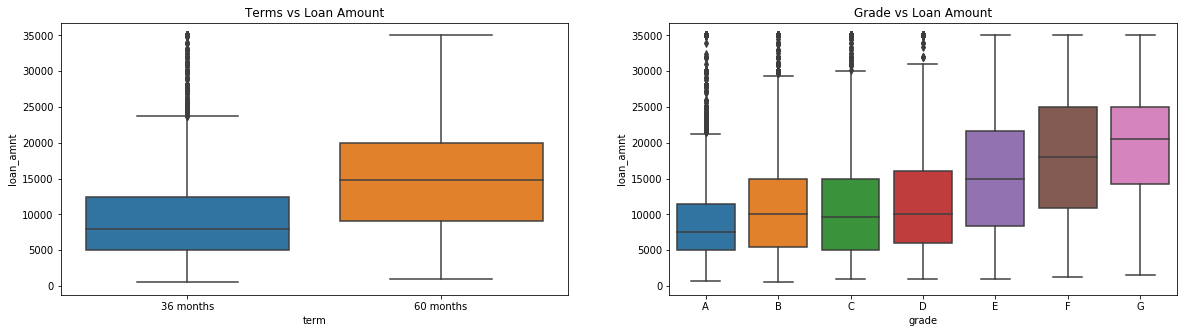

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_df.loan_amnt, data=loan_df)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.loan_amnt, order = grade_ord, data=loan_df)

Observation : Bigger amount loans have high tenure of 60 months.Grade G and F have taken maximum loan amount

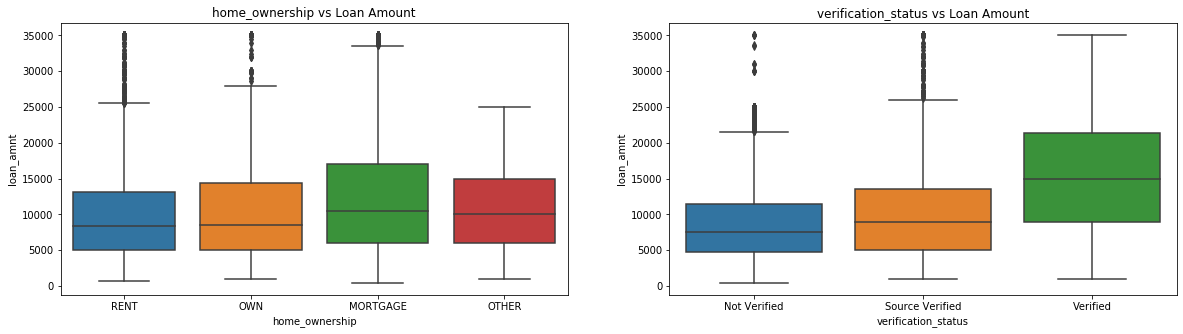

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_df.loan_amnt, data=loan_df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_df.loan_amnt, order = verification_status_ord, data=loan_df)

Observation : more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

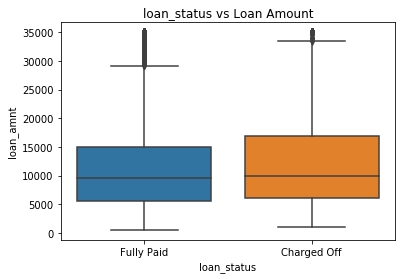

In [56]:
sns.boxplot(x='loan_status', y=loan_df.loan_amnt, data=loan_df)
plt.title('loan_status vs Loan Amount')
# OBS : Charged Off loans have higher amounts than Fully Paid ones

Text(0.5, 1.0, 'purpose vs Loan Amount')

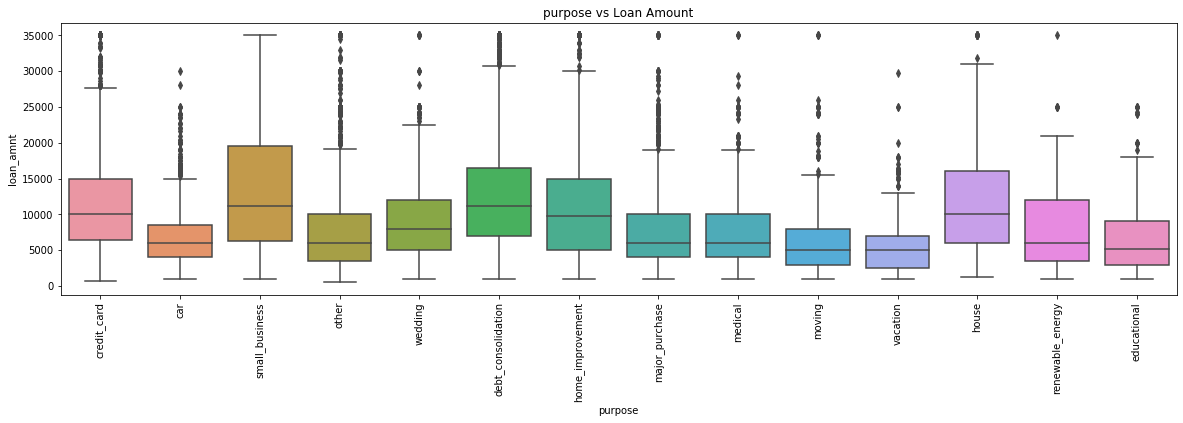

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.loan_amnt, data=loan_df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

Text(0.5, 1.0, 'emp_length vs Loan Amount')

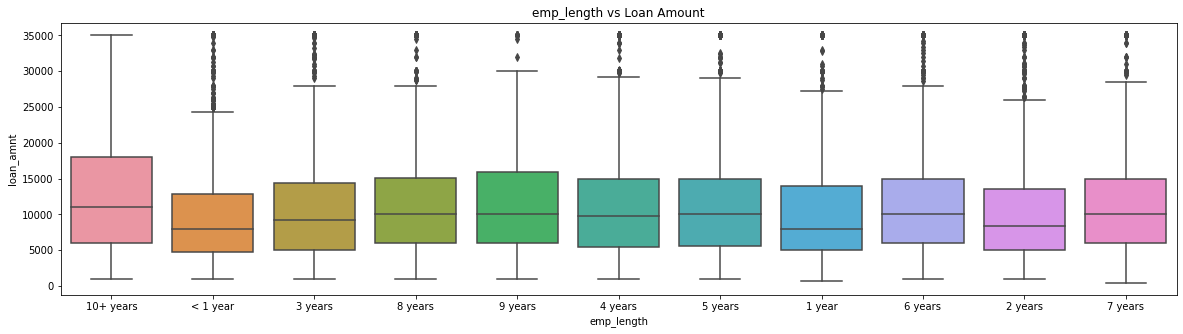

In [58]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.loan_amnt, data=loan_df)
plt.title('emp_length vs Loan Amount')

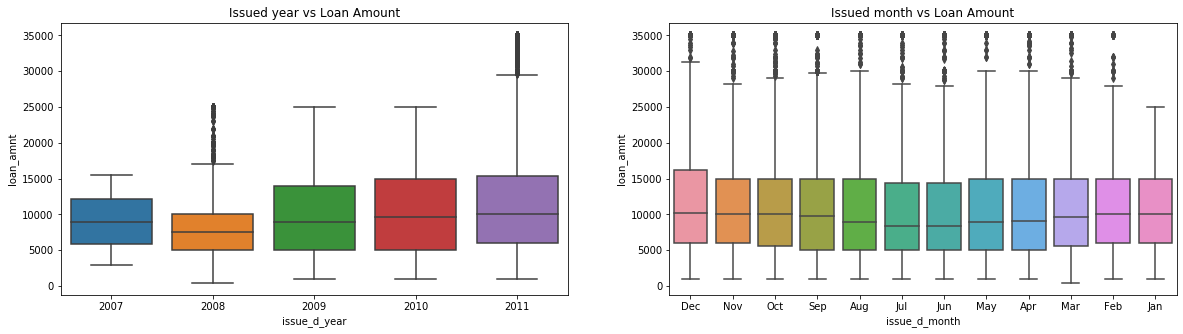

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_df.issue_d_year, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan_df.issue_d_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued month vs Loan Amount')
plt.show()

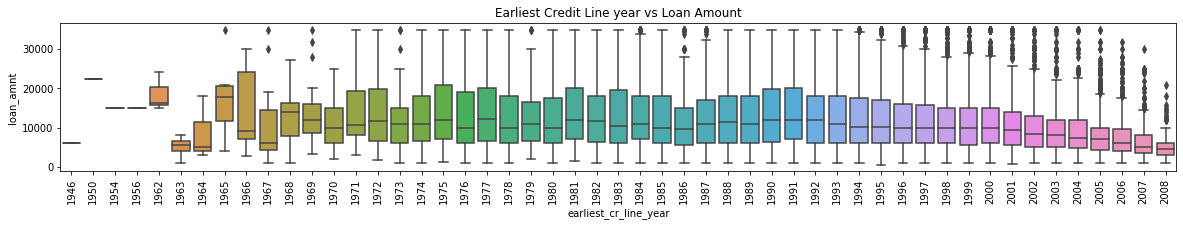

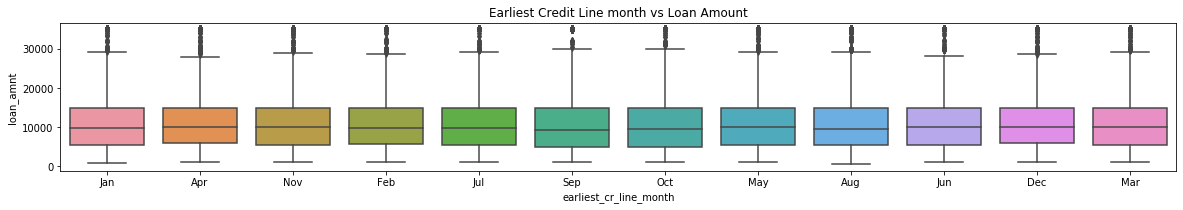

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=loan_df.earliest_cr_line_year, y=loan_df.loan_amnt, data=loan_df)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=loan_df.earliest_cr_line_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

Observation : Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others

funded_amnt

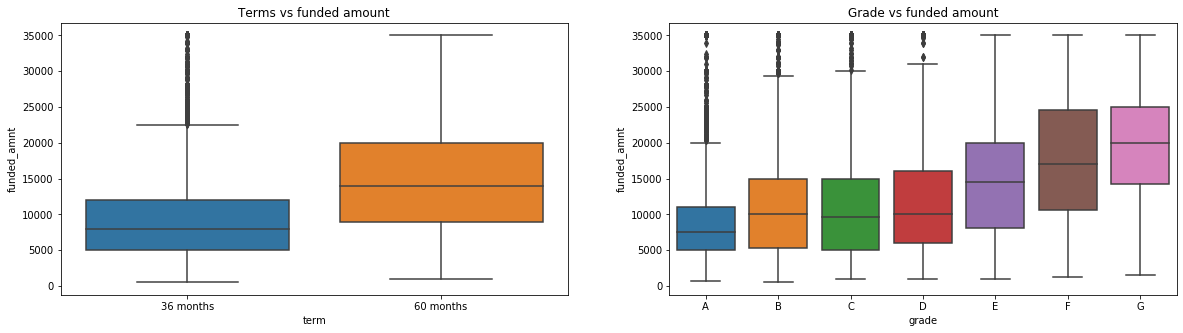

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_df.funded_amnt, data=loan_df)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.funded_amnt, order = grade_ord, data=loan_df)

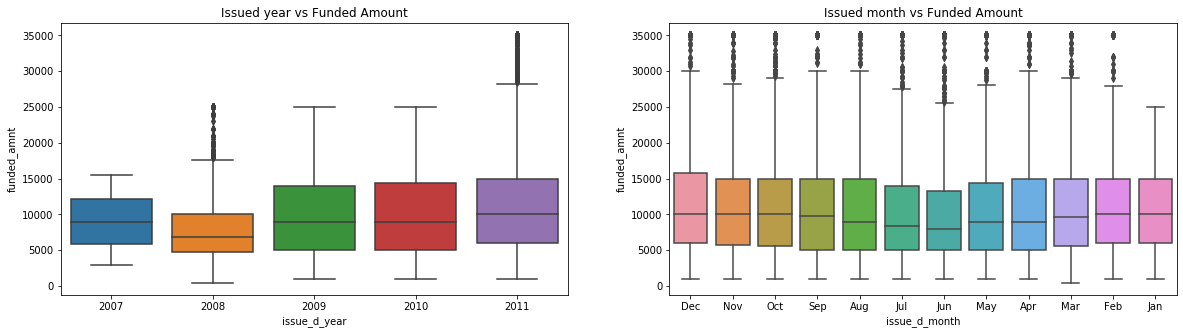

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_df.issue_d_year, y=loan_df.funded_amnt, data=loan_df)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=loan_df.issue_d_month, y=loan_df.funded_amnt, data=loan_df)
plt.title('Issued month vs Funded Amount')
plt.show()

Text(0.5, 1.0, 'loan_status vs Funded amnt')

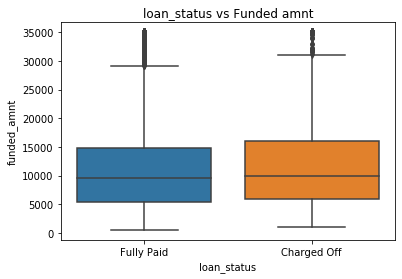

In [63]:
sns.boxplot(x='loan_status', y=loan_df.funded_amnt, data=loan_df)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'purpose vs funded amount')

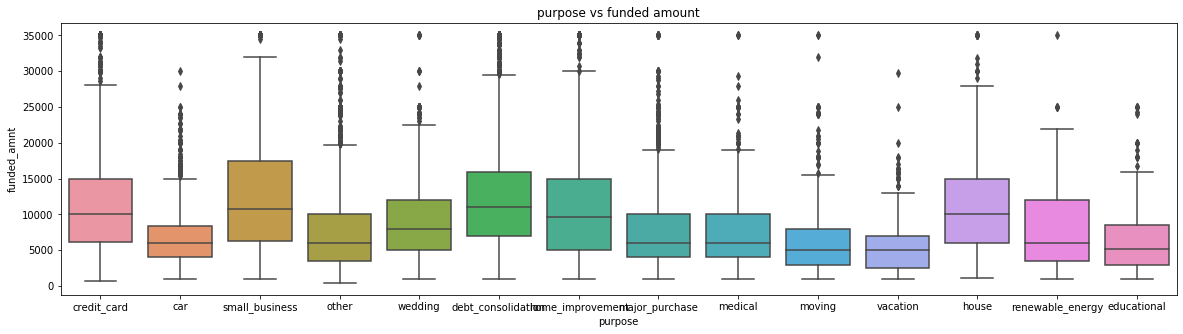

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.funded_amnt, data=loan_df)
plt.title('purpose vs funded amount')

Text(0.5, 1.0, 'emp_length vs funded amount')

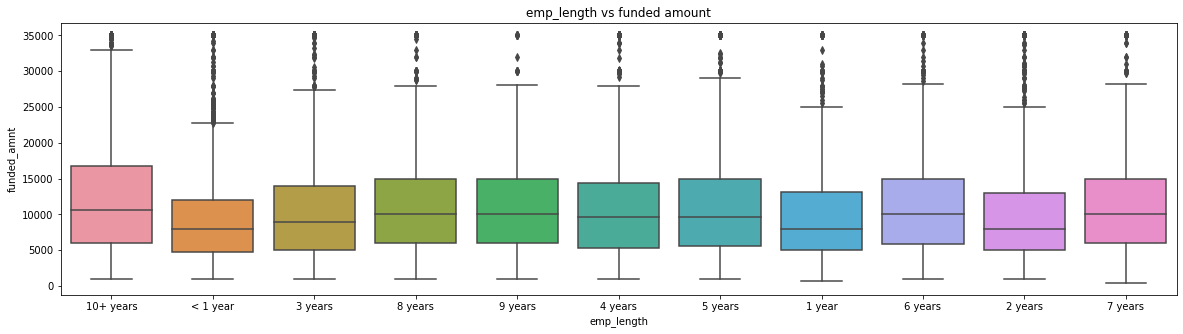

In [65]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.funded_amnt, data=loan_df)
plt.title('emp_length vs funded amount')

int_rate

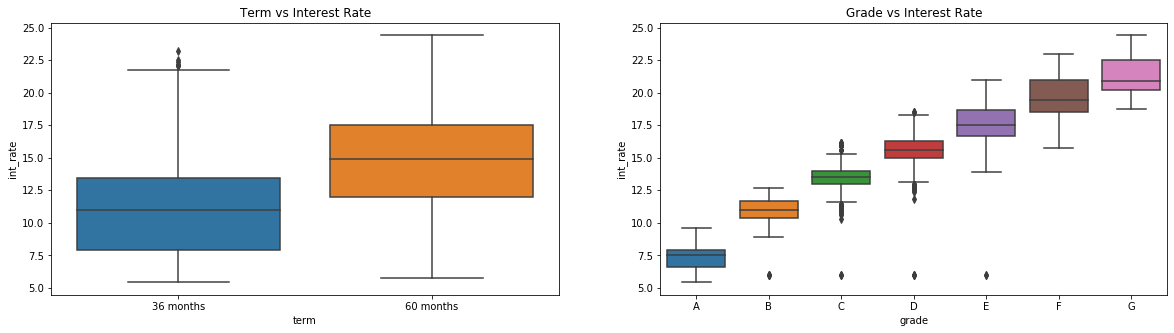

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_df.int_rate, data=loan_df)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.int_rate, order = grade_ord, data=loan_df)

Observation :Interest rates are higher for High tenure loans

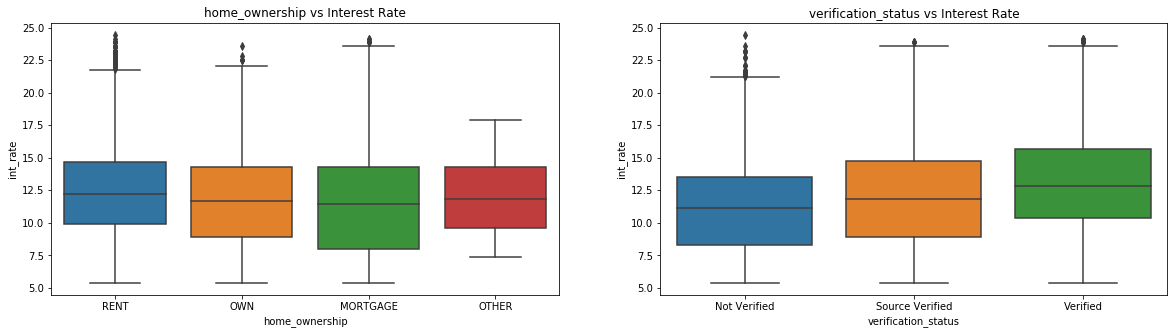

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_df.int_rate, data=loan_df)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_df.int_rate, order = verification_status_ord, data=loan_df)

Observation:Borrowers with Own and Mortgage got loans with less interest rates as the security will be there.
And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

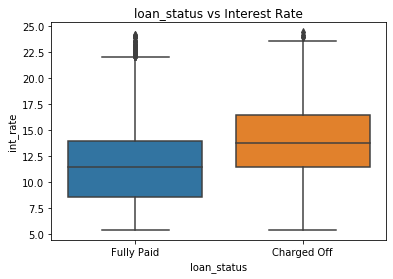

In [68]:
sns.boxplot(x='loan_status', y=loan_df.int_rate, data=loan_df)
plt.title('loan_status vs Interest Rate')

Text(0.5, 1.0, 'purpose vs Interest Rate')

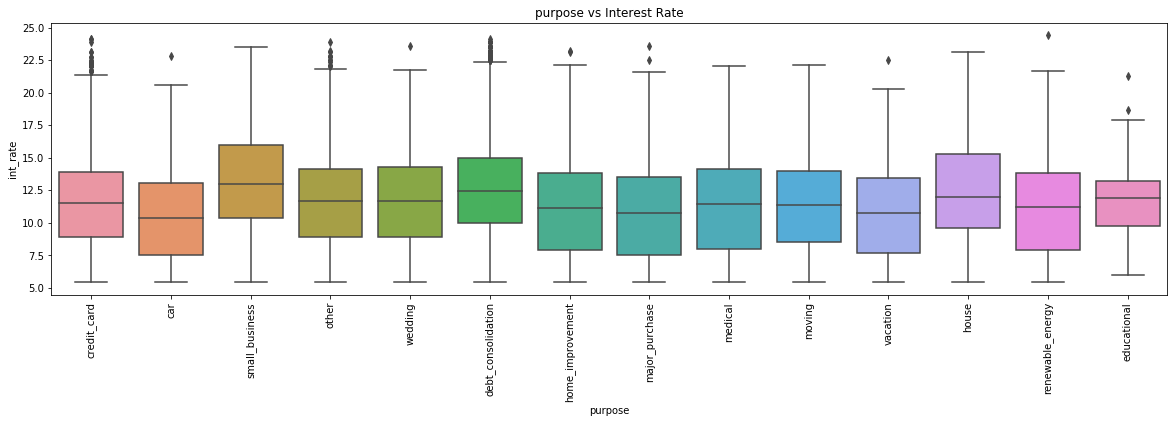

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.int_rate, data=loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

Text(0.5, 1.0, 'emp_length vs Interest Rate')

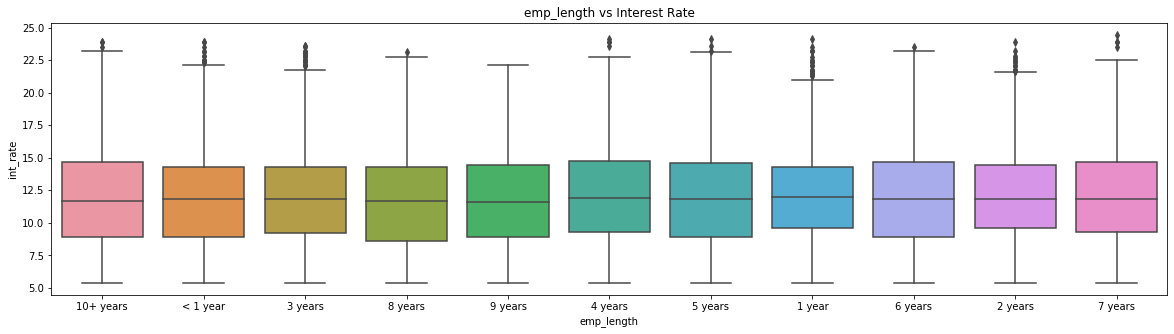

In [70]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.int_rate, data=loan_df)
plt.title('emp_length vs Interest Rate')

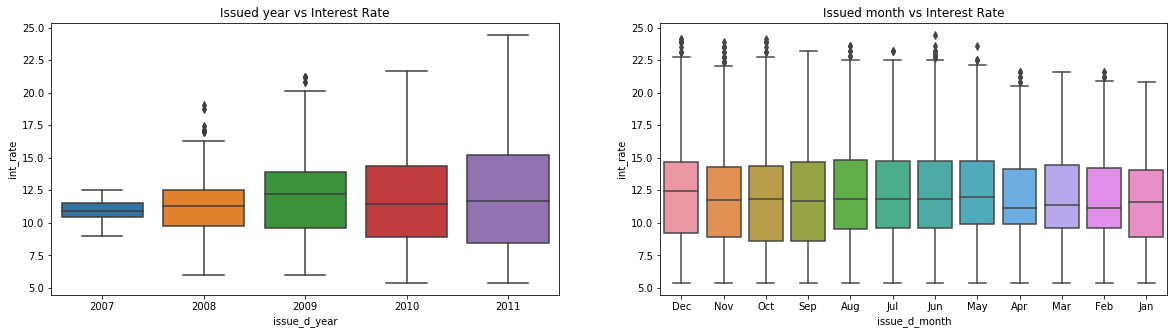

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_df.issue_d_year, y=loan_df.int_rate, data=loan_df)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=loan_df.issue_d_month, y=loan_df.int_rate, data=loan_df)
plt.title('Issued month vs Interest Rate')
plt.show()

Observation : Interest rate is raising with respect to years but the median kept same

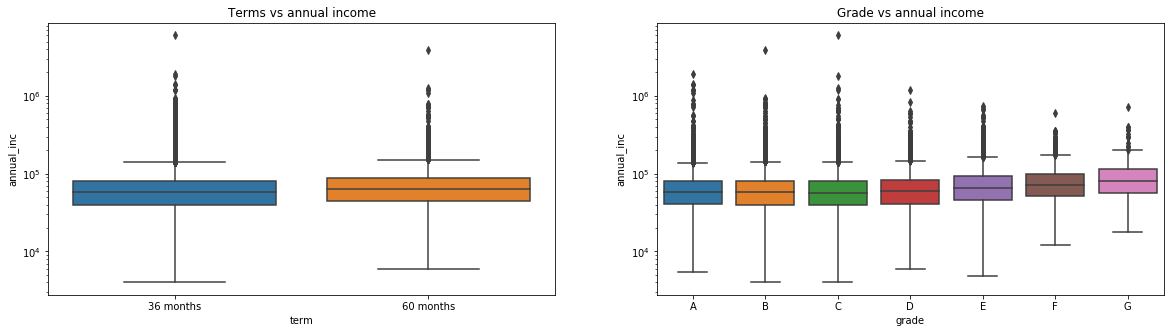

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_df.annual_inc, data=loan_df)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.annual_inc, order = grade_ord, data=loan_df)
plt.yscale('log')

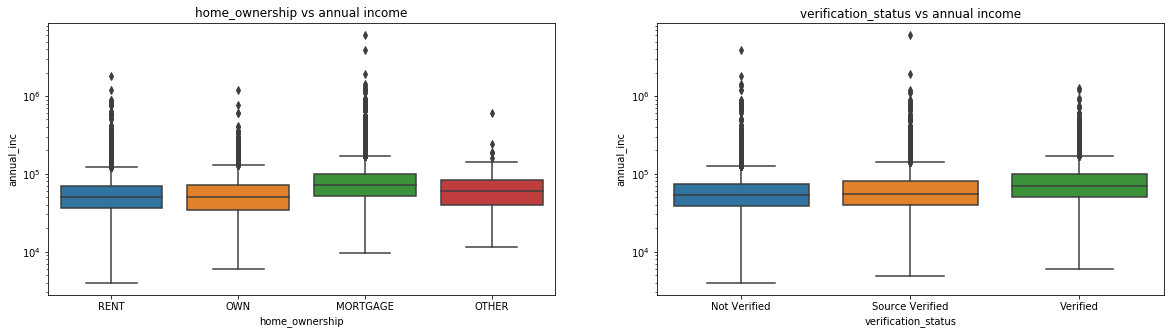

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_df.annual_inc, data=loan_df)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_df.annual_inc, order = verification_status_ord, data=loan_df)
plt.yscale('log')

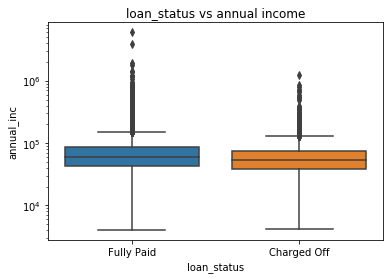

In [74]:
sns.boxplot(x='loan_status', y=loan_df.annual_inc, data=loan_df)
plt.title('loan_status vs annual income')
plt.yscale('log')

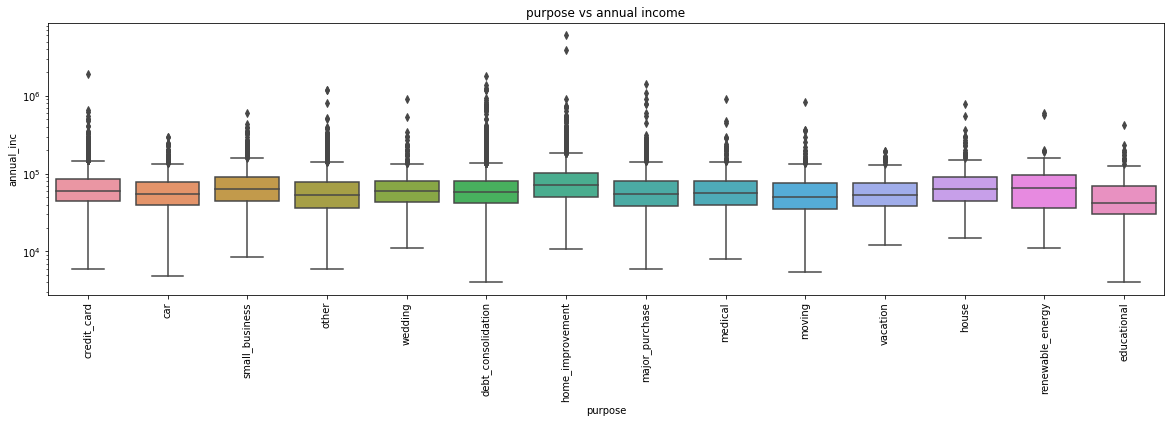

In [75]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.annual_inc, data=loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

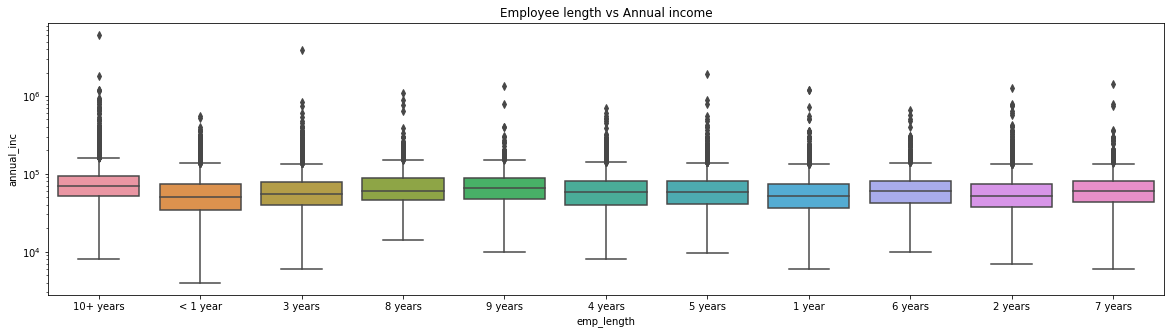

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.annual_inc, data=loan_df)
plt.title('Employee length vs Annual income')
plt.yscale('log')

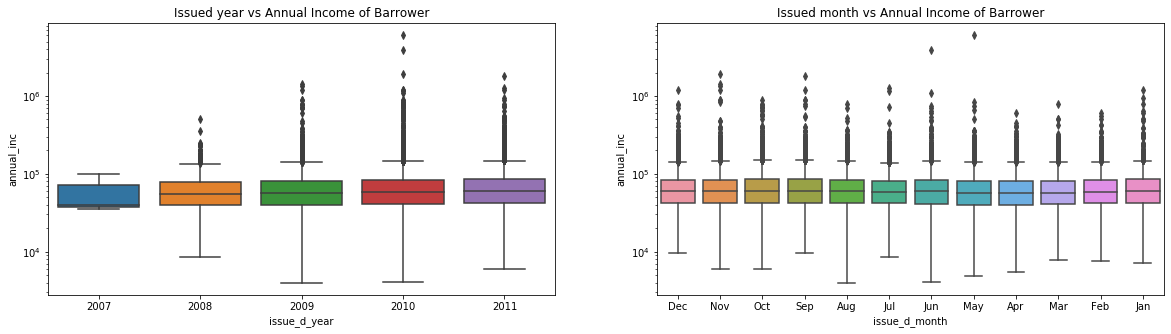

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_df.issue_d_year, y=loan_df.annual_inc, data=loan_df)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=loan_df.issue_d_month, y=loan_df.annual_inc, data=loan_df)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

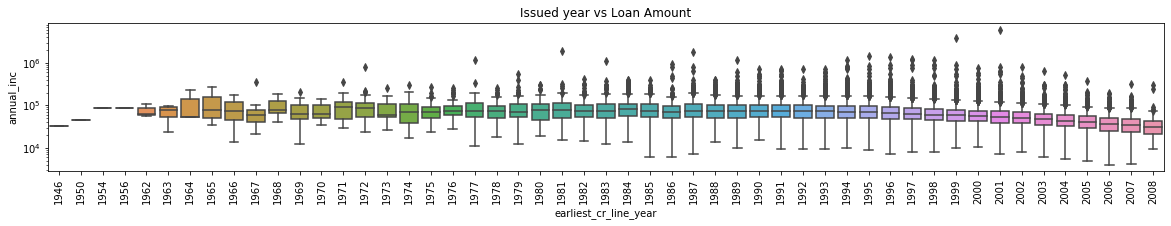

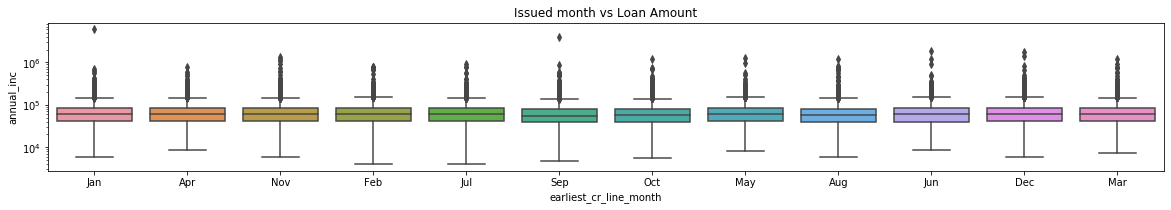

In [78]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=loan_df.earliest_cr_line_year, y=loan_df.annual_inc, data=loan_df)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=loan_df.earliest_cr_line_month, y=loan_df.annual_inc, data=loan_df)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

Observation: There is no pattern in the annual income, earliest Credit line year and month

DTI

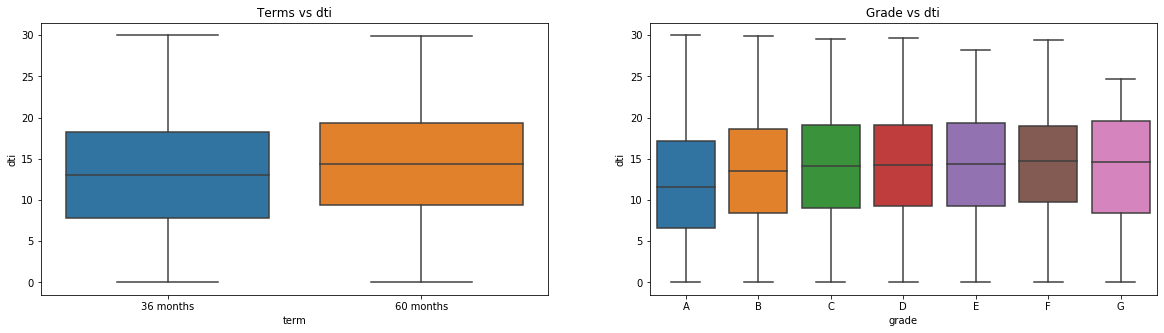

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_df.dti, data=loan_df)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.dti, order = grade_ord, data=loan_df)

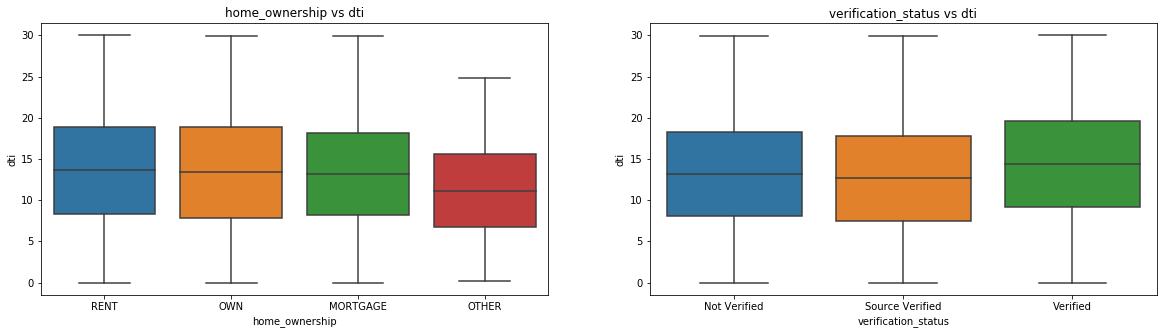

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_df.dti, data=loan_df)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_df.dti, order = verification_status_ord, data=loan_df)

Text(0.5, 1.0, 'loan_status vs dti')

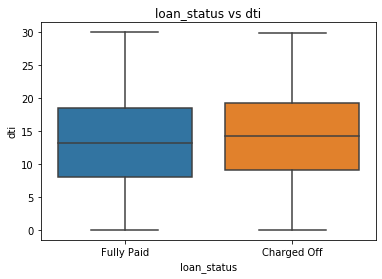

In [81]:
sns.boxplot(x='loan_status', y=loan_df.dti, data=loan_df)
plt.title('loan_status vs dti')

Text(0.5, 1.0, 'purpose vs dti')

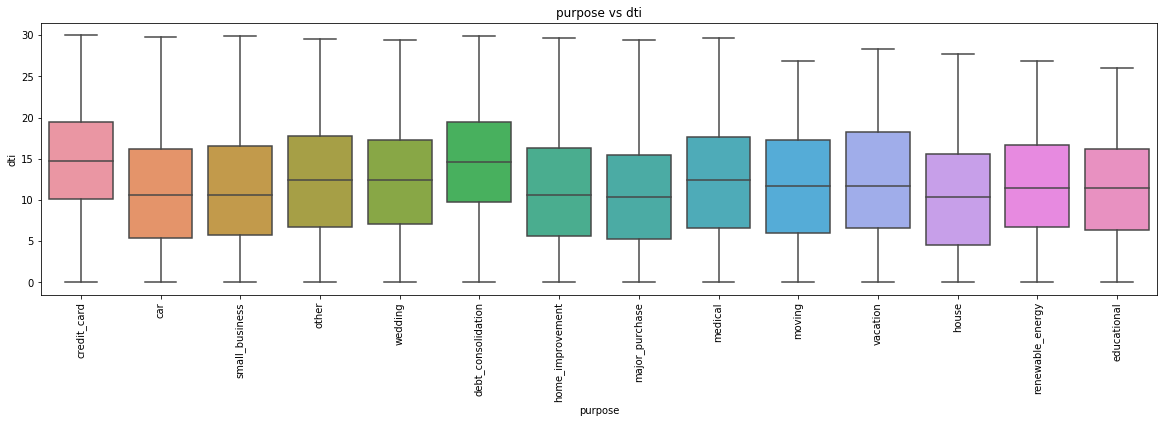

In [82]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.dti, data=loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

Text(0.5, 1.0, 'emp_length vs dti')

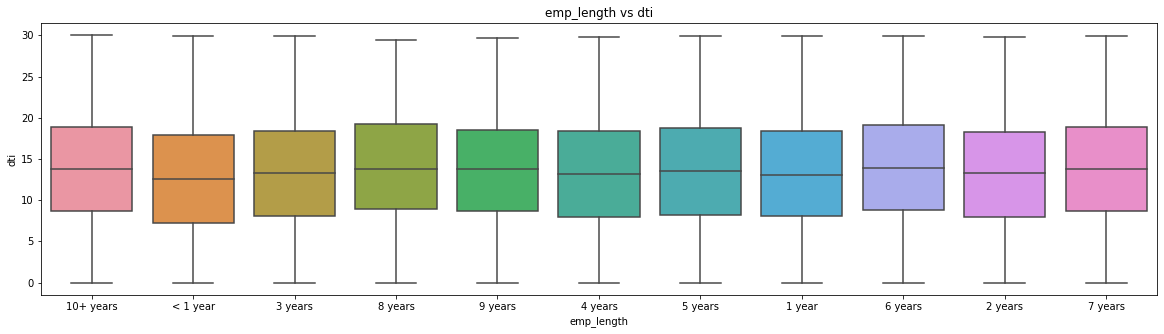

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.dti, data=loan_df)
plt.title('emp_length vs dti')

Observation: dti is similar for borrowers with the employment length

pub_rec

In [84]:
df = loan_df.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

pub_rec       term     id  proportion
0        0  36 months  26152    0.749964
1        0  60 months   8719    0.250036
2        1  36 months   1349    0.719467
3        1  60 months    526    0.280533
4        2  36 months     36    0.800000
5        2  60 months      9    0.200000
6        3  36 months      7    1.000000
7        4  36 months      2    1.000000

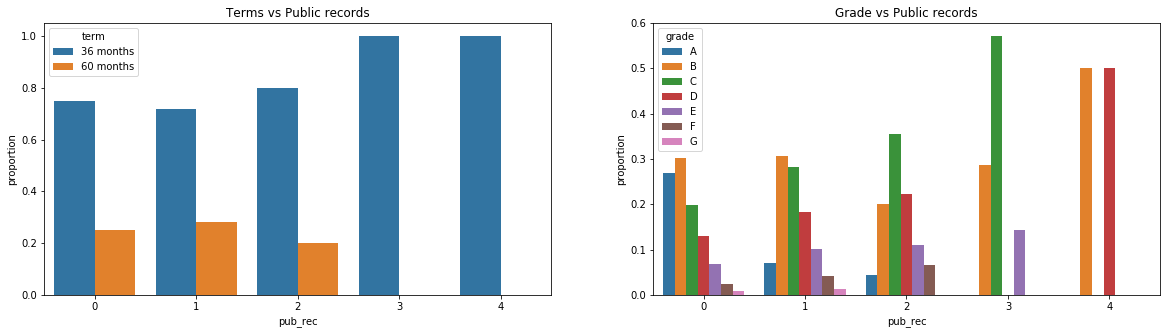

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = loan_df.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

Observation : C D E graded people is having high pub_rec

Text(0.5, 1.0, 'Verification status vs Public records')

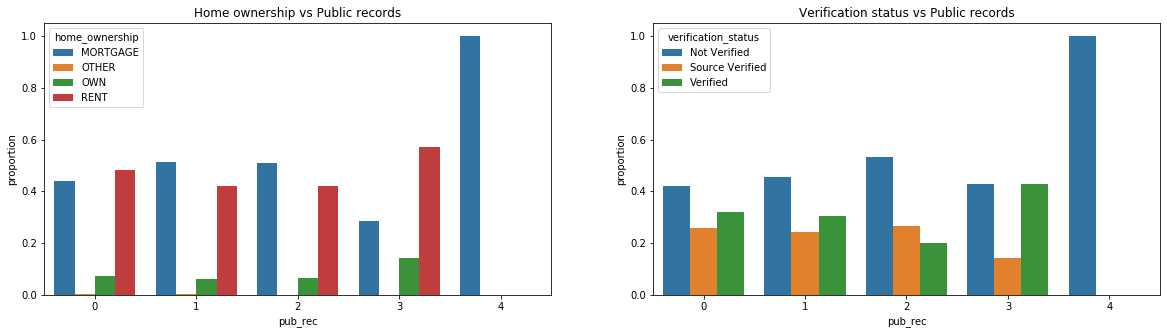

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan_df.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = loan_df.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

Text(0.5, 0.98, 'loan status vs Public records')

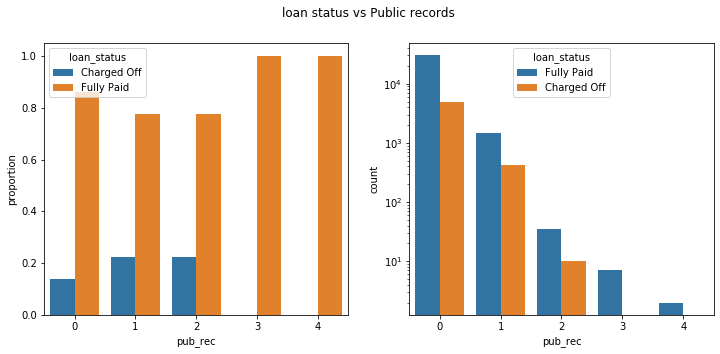

In [87]:
df = loan_df.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(loan_df.pub_rec, hue='loan_status', data=loan_df)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

Text(0.5, 1.0, 'Purpose vs Public records')

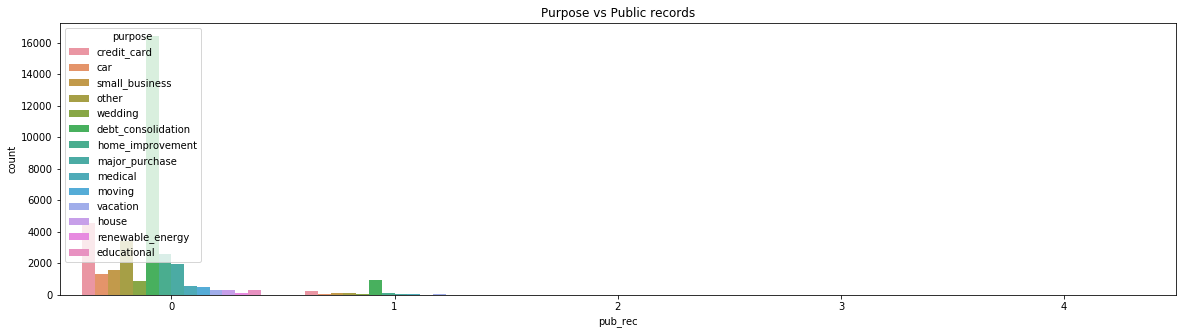

In [88]:
plt.figure(figsize=(20,5))
sns.countplot(loan_df.pub_rec, hue='purpose', data=loan_df)
plt.title('Purpose vs Public records')

Text(0.5, 1.0, 'Employee length vs Public records')

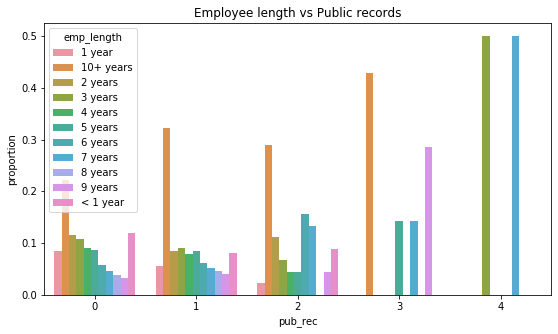

In [89]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = loan_df.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

pub_rec_bankruptcies


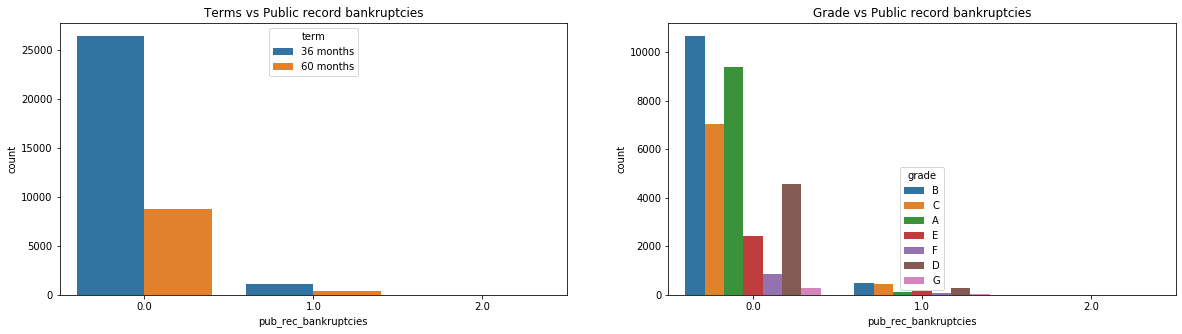

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(loan_df.pub_rec_bankruptcies, hue='term', data=loan_df)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.countplot(loan_df.pub_rec_bankruptcies, hue='grade', data=loan_df)

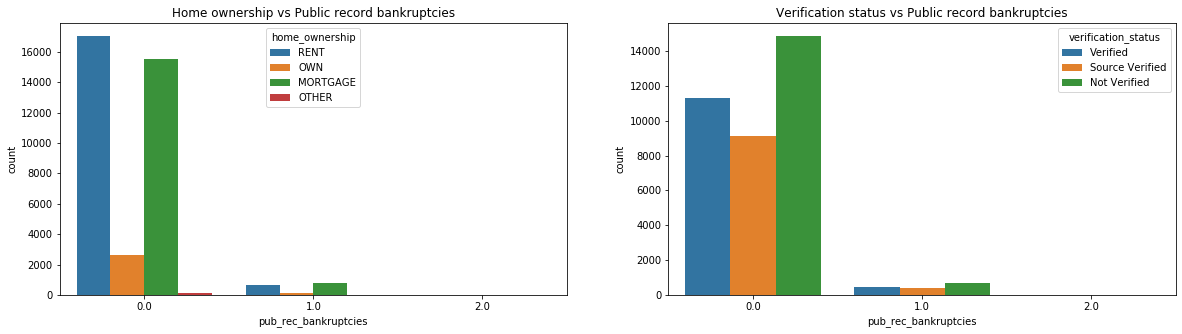

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(loan_df.pub_rec_bankruptcies, hue='home_ownership', data=loan_df)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.countplot(loan_df.pub_rec_bankruptcies, hue='verification_status', data=loan_df)

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

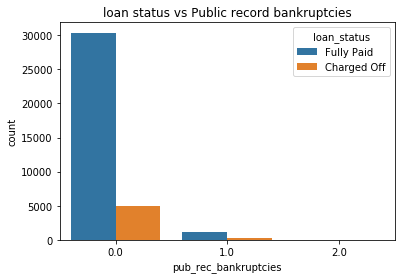

In [92]:
sns.countplot(loan_df.pub_rec_bankruptcies, hue='loan_status', data=loan_df)
plt.title('loan status vs Public record bankruptcies')

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

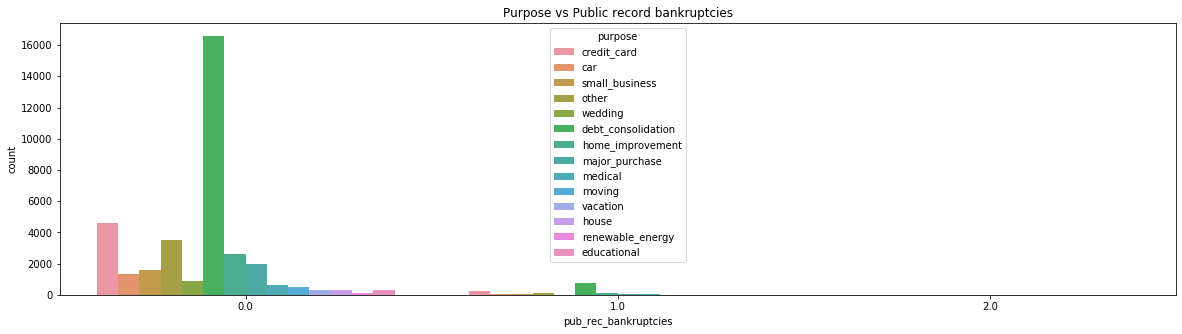

In [93]:
plt.figure(figsize=(20,5))
sns.countplot(loan_df.pub_rec_bankruptcies, hue='purpose', data=loan_df)
plt.title('Purpose vs Public record bankruptcies')

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

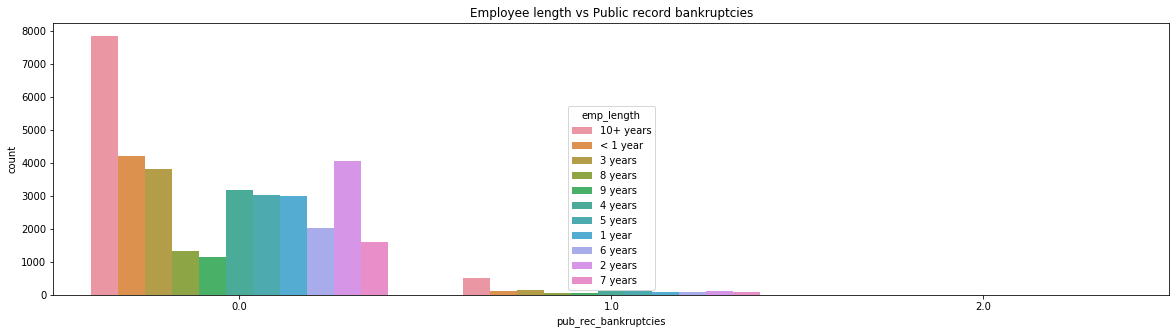

In [94]:
plt.figure(figsize=(20,5))
sns.countplot(loan_df.pub_rec_bankruptcies, hue='emp_length', data=loan_df)
plt.title('Employee length vs Public record bankruptcies')

inq_last_6mths


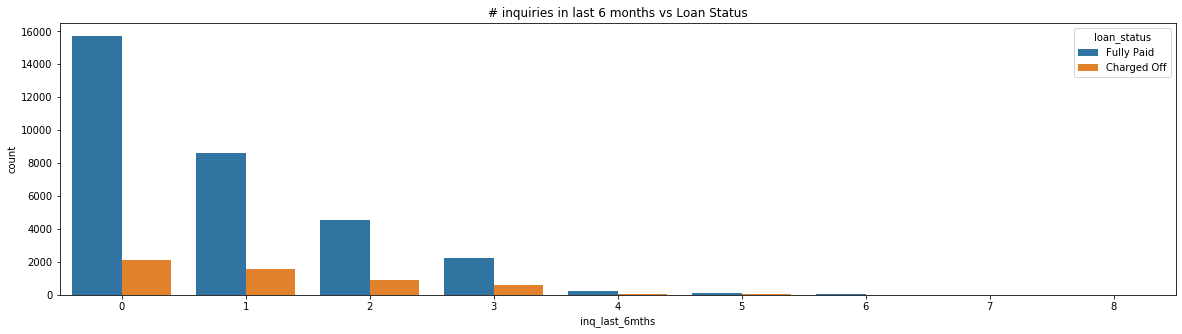

In [95]:
plt.figure(figsize=(20,5))
sns.countplot(loan_df.inq_last_6mths, hue='loan_status', data=loan_df)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()


Approval Loan Amount Ratio


Text(0.5, 1.0, 'emp_length vs Approval Loan Amount Ratio')

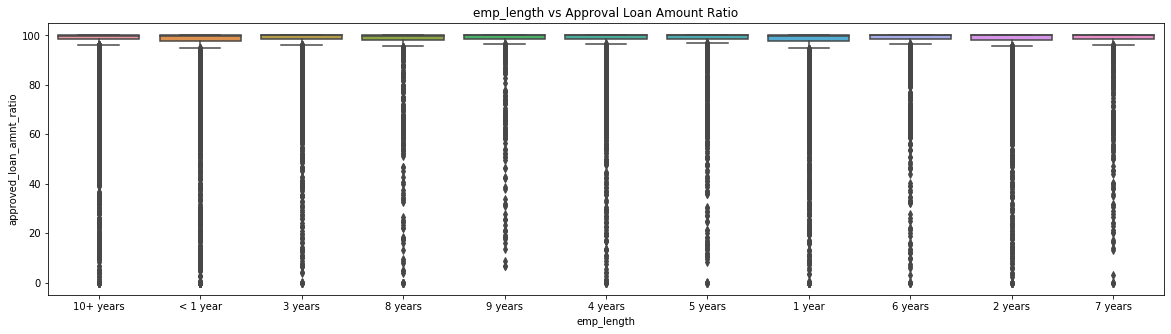

In [96]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('emp_length vs Approval Loan Amount Ratio')

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

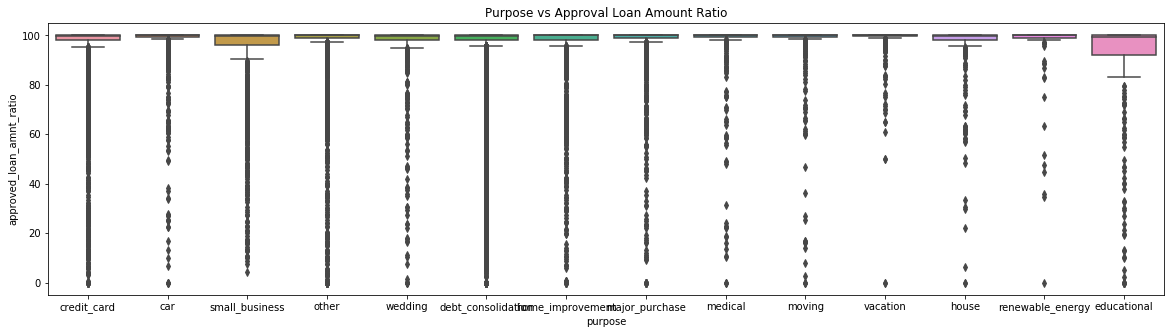

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('Purpose vs Approval Loan Amount Ratio')

Observation:Funded amount by investors is lower than requested loan amount in education and small business purposes.

Text(0.5, 1.0, 'Home Ownership vs Approval Loan Amount Ratio')

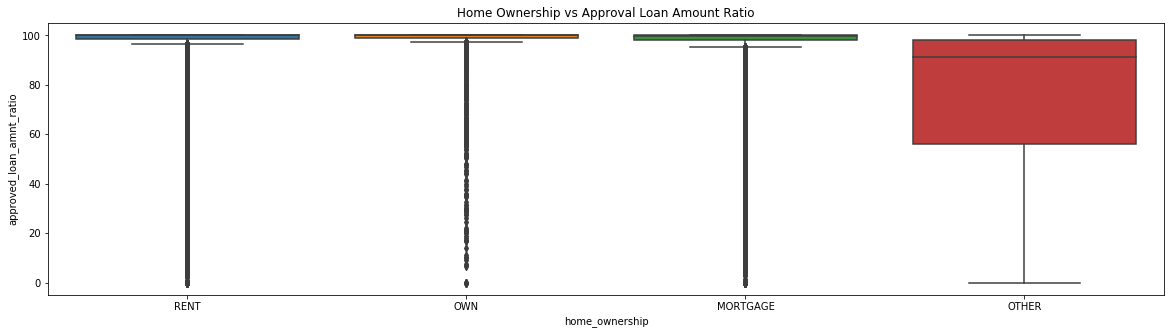

In [98]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=loan_df.approved_loan_amnt_ratio, data=loan_df)
plt.title('Home Ownership vs Approval Loan Amount Ratio')

Observation :Borrowers with Other home ownership are having less approved ratio which mean they got less amount than request amount.

# Bivariate Analysis

Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

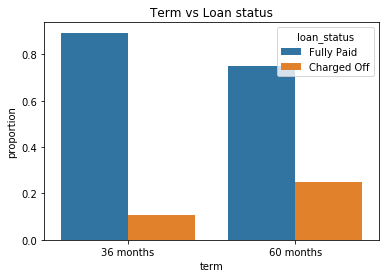

In [99]:
df = loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

Observation : 36month borrower is paying better than the 60month borrowers

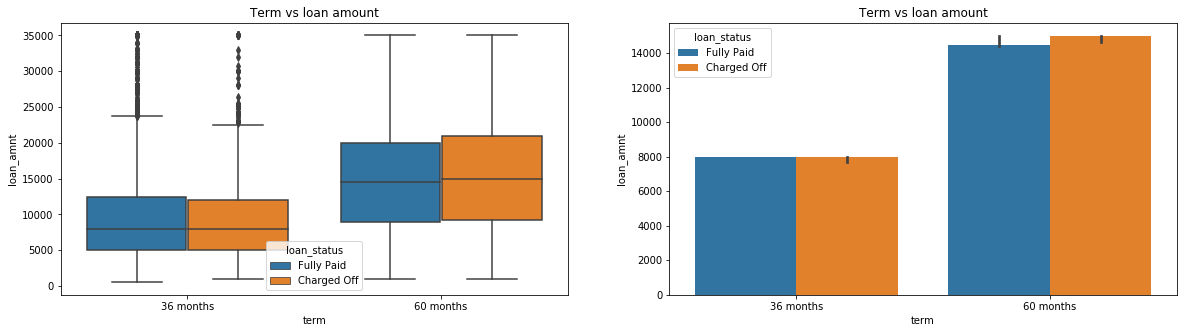

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

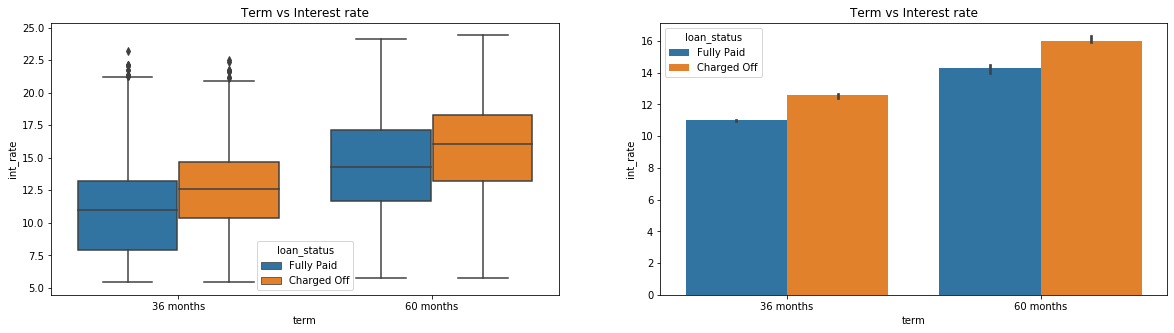

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

Observation:higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

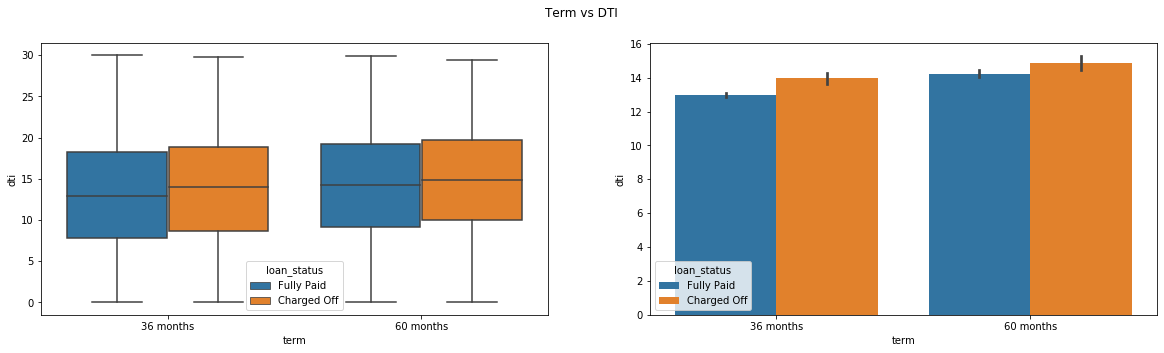

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

Observation : Charge-off is higher when compared with the fully-paid for the Debit to income ratio.

Grade

Text(0.5, 1.0, 'Grade vs Loan status')

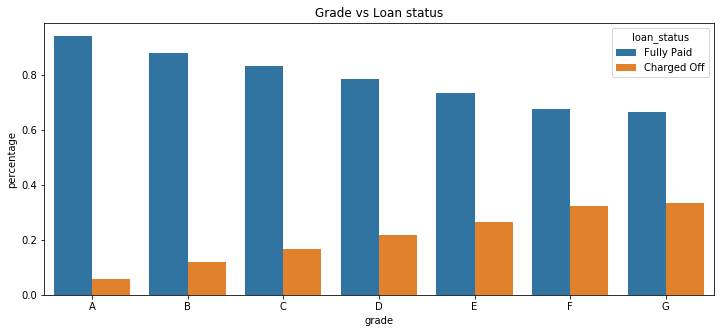

In [103]:
#Sorting Grades from A to G
grade_ord = loan_df.grade.unique()
grade_ord.sort()


df = loan_df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

Observation : Graph says that as charged off increases grade decreases

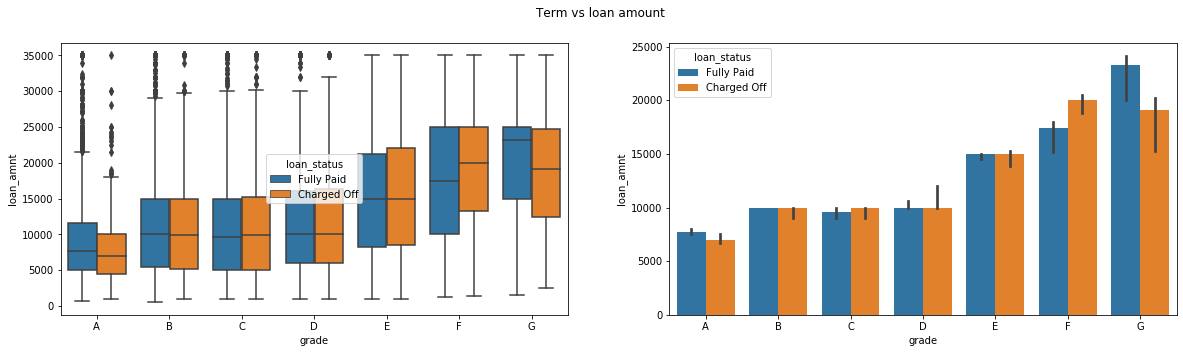

In [104]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_df, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

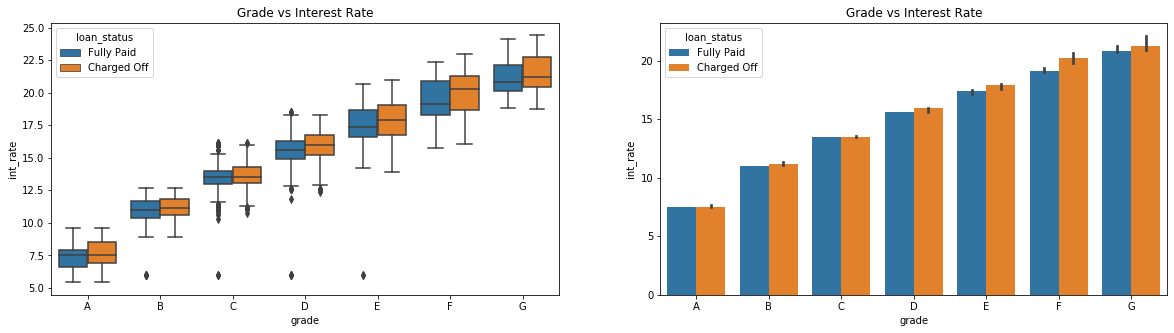

In [105]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_df, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_df, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

Observation:grade decreases the interest rate is increasing and they are more to default the loan.

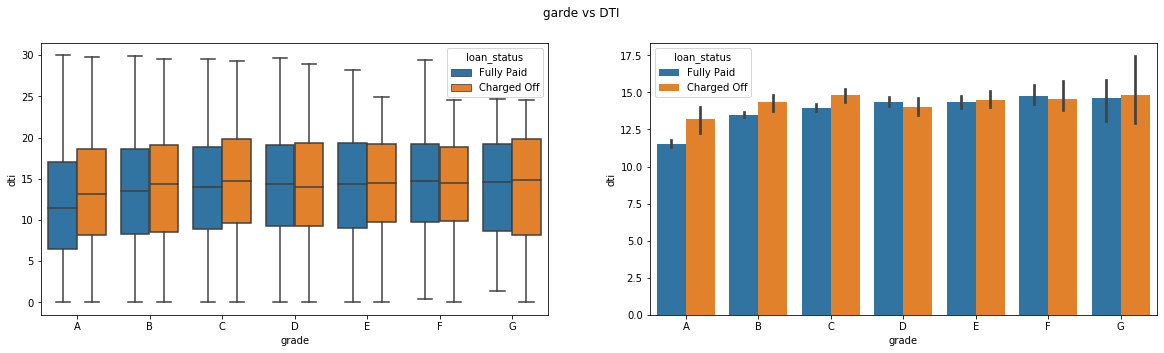

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan_df, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan_df, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

Employment Length

Text(0.5, 1.0, 'Grade vs Loan status')

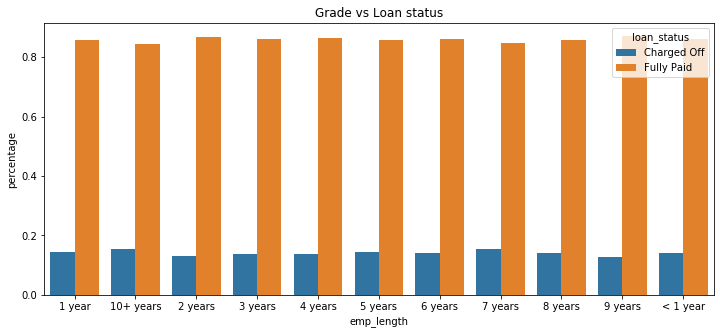

In [107]:
df = loan_df.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

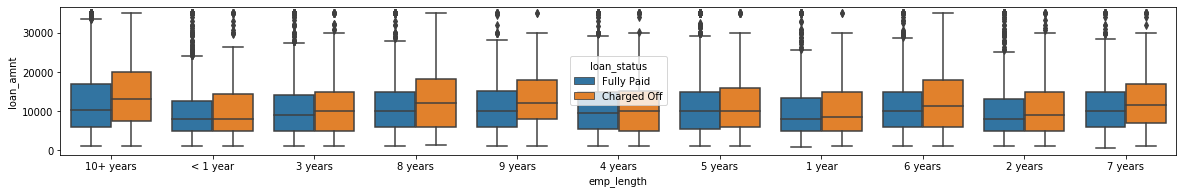

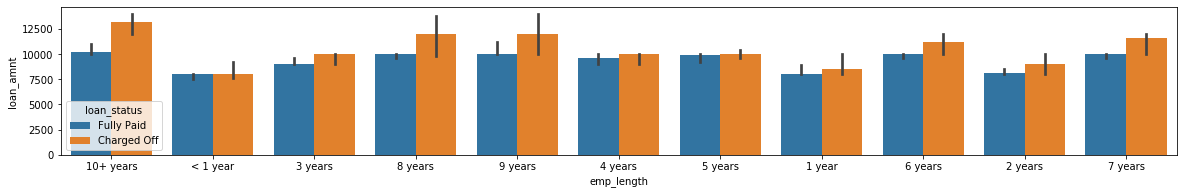

In [108]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.show()

Observation:Borrowers with higher employment lengths and took more loan amounts got more default rate.

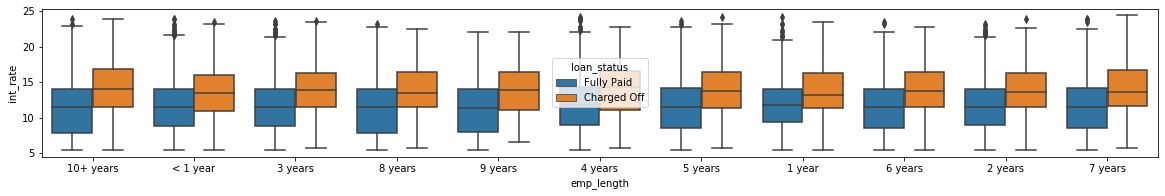

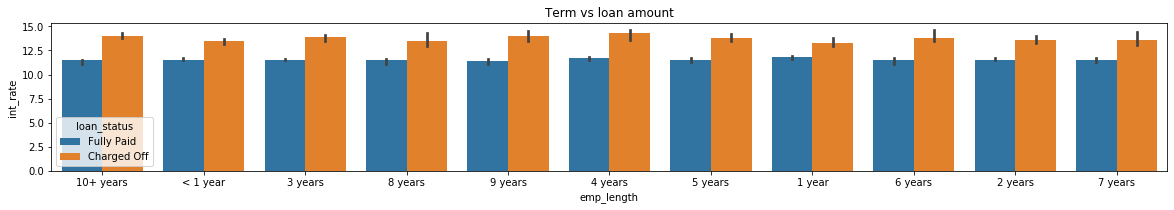

In [109]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

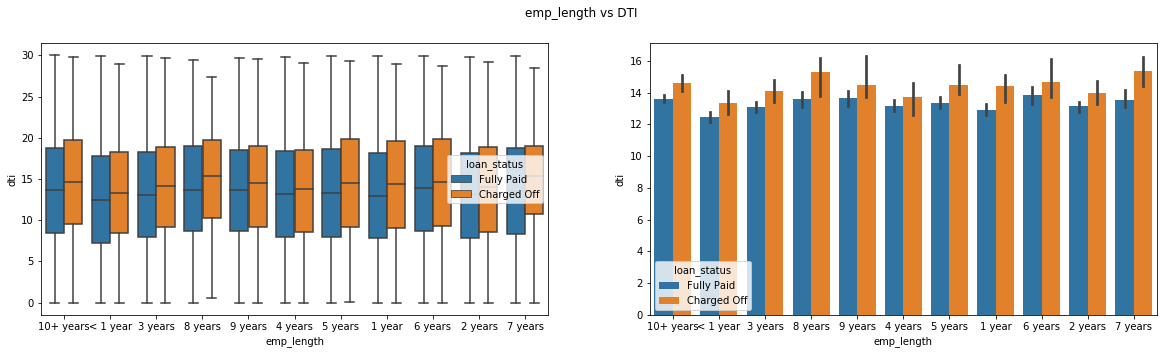

In [110]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

Observation:Employment Length and DTI are not showing any patterns towards defaults.

Home vs Ownership

Text(0.5, 1.0, 'Home Ownership vs Loan status')

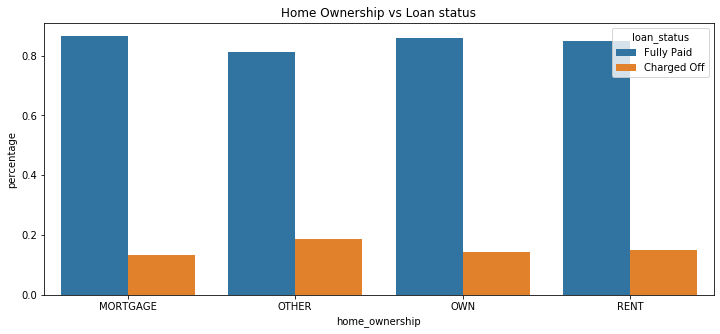

In [111]:
df = loan_df.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

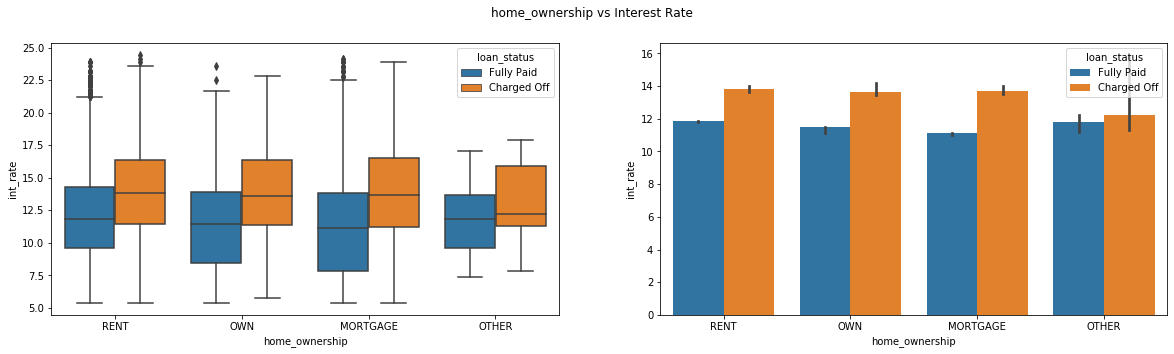

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

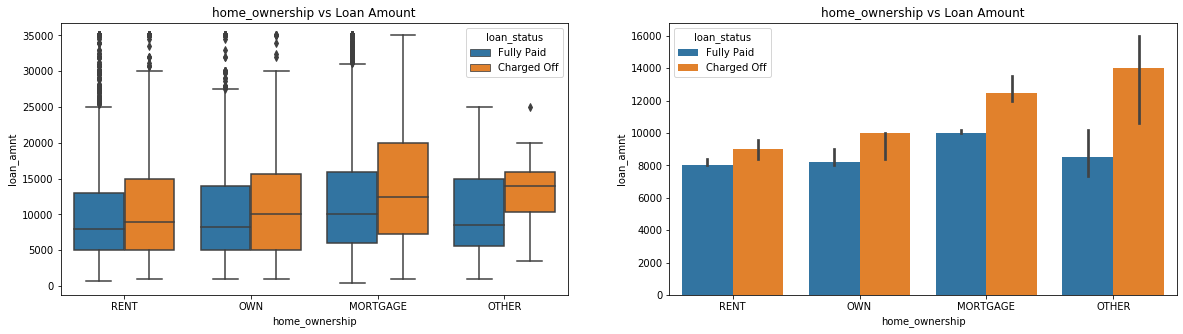

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

Observation : Borrowers who took higher loan amounts defaulted more than others

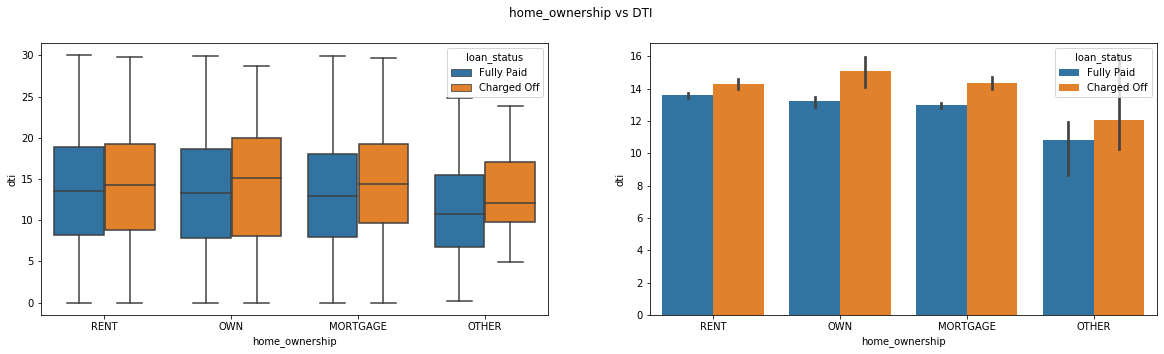

In [114]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

Address State

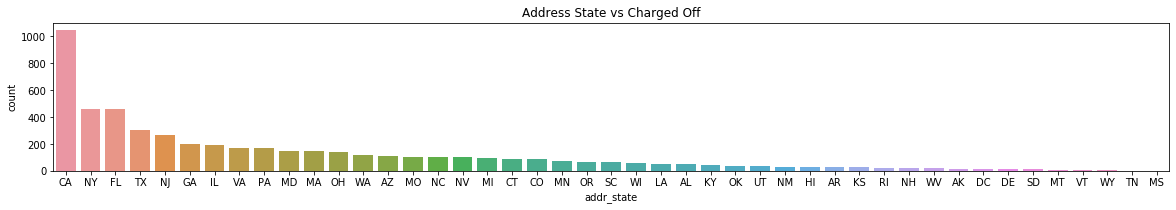

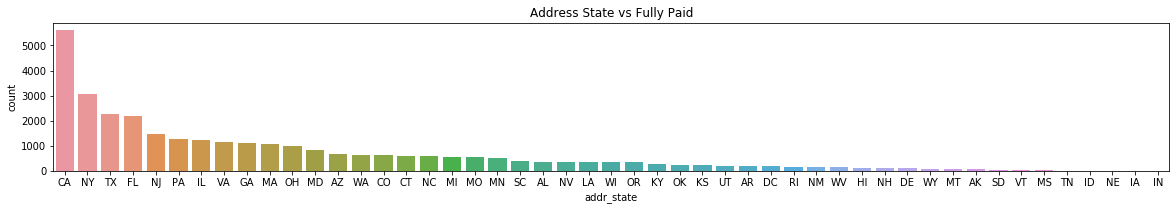

In [115]:
charged_off_df = loan_df[loan_df.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = loan_df[loan_df.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

Observation:More number of borrowers defaulted in CA , FL and NY states

Text(0.5, 1.0, 'Grade vs Loan status')

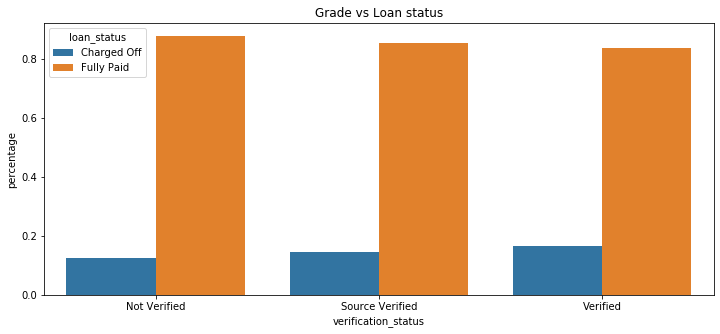

In [116]:
df = loan_df.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

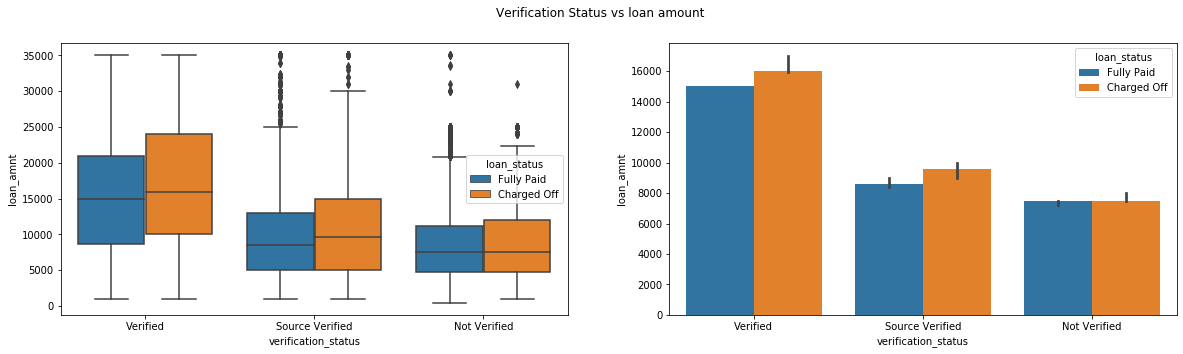

In [117]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

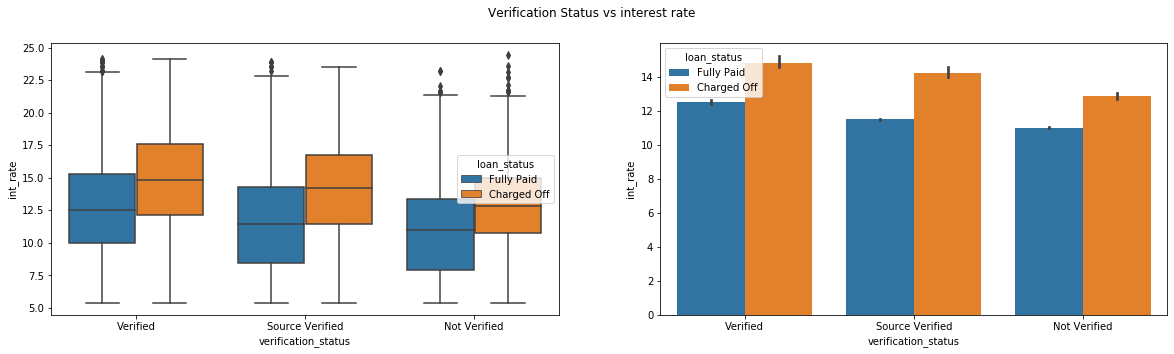

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

Observations:Irrespective of verification status higher interest rates are incurring default of loan

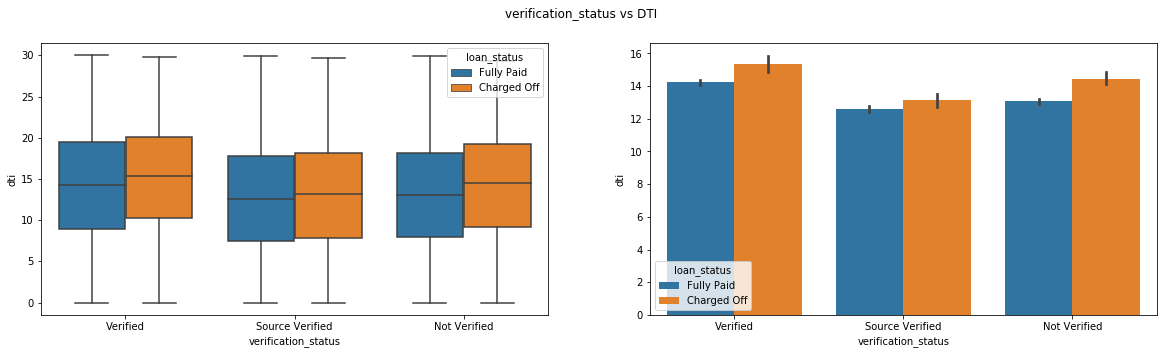

In [119]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan_df)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan_df, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

Observation:There is slight increase in the dti mean for defaulted laons for all the verification status categories

Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

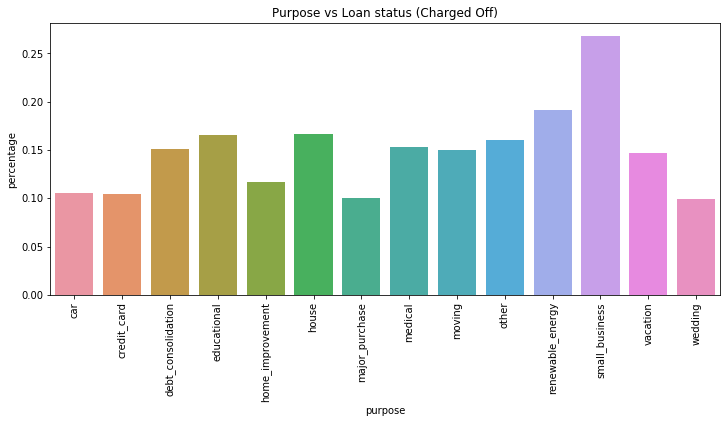

In [120]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

Observation:Charged-off is higher for small_business.

<Figure size 432x288 with 0 Axes>

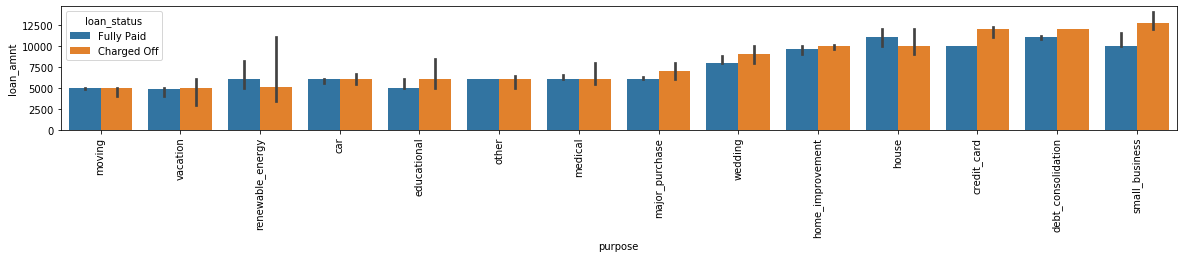

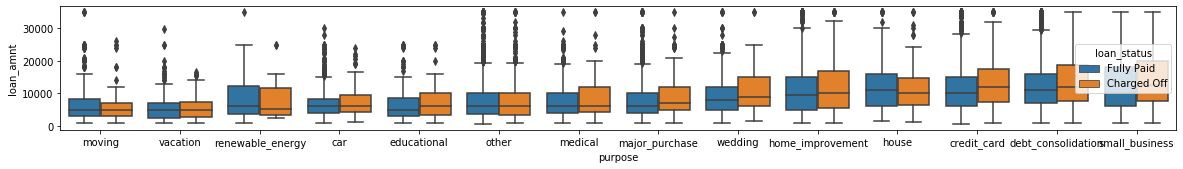

In [121]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_df, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

Observation:Small Business has more defaults when the loan amount is also high

<Figure size 432x288 with 0 Axes>

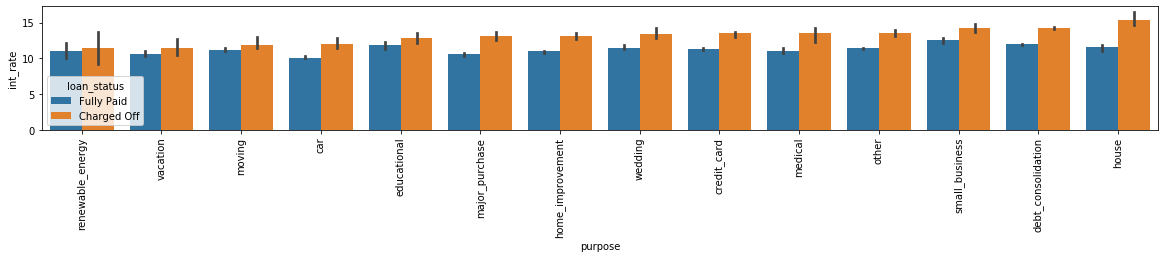

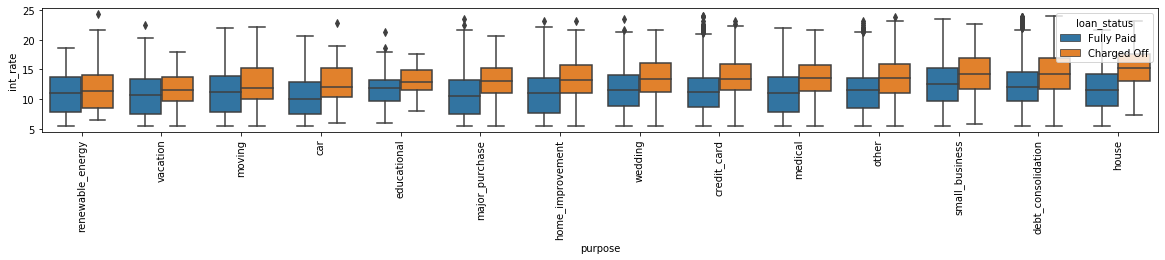

In [122]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan_df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan_df, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

Observation:Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

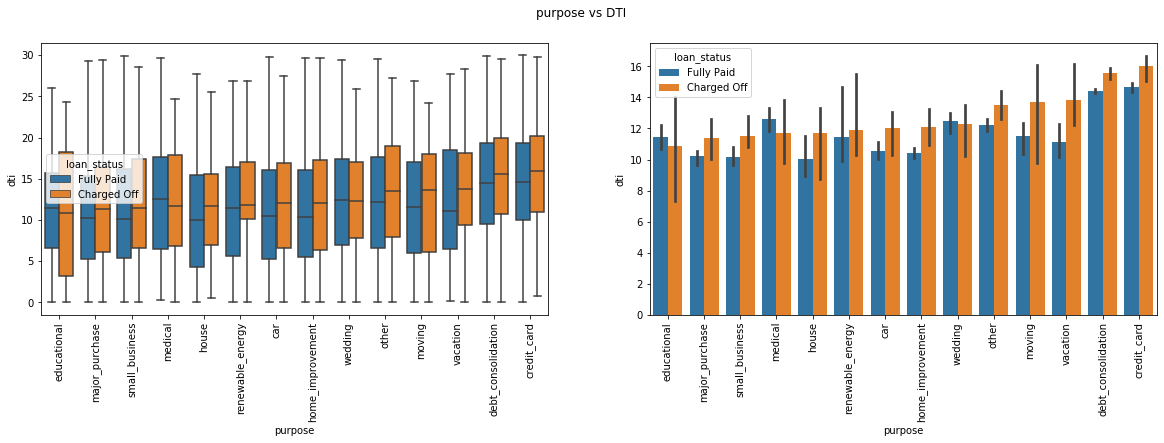

In [123]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan_df, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan_df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()


Loan Amount vs Interest Rate

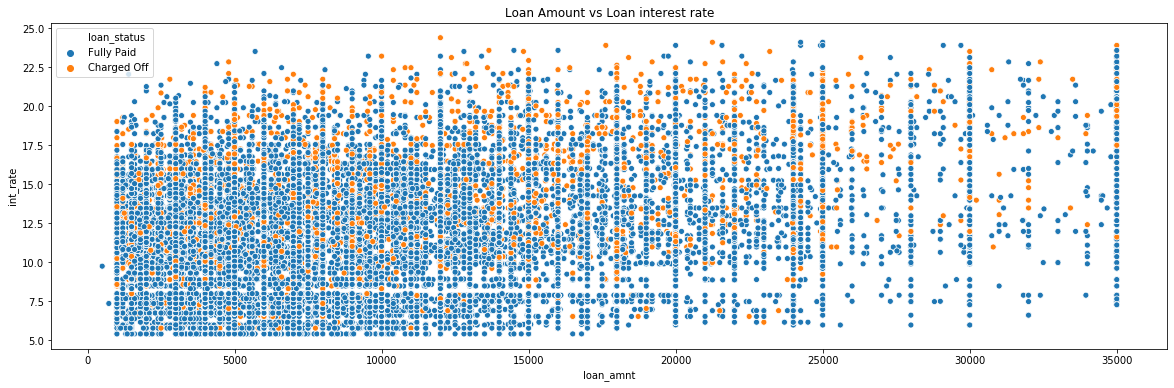

In [124]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

In [ ]:
Observartion:No pattern found

Loan Amount vs Annual income

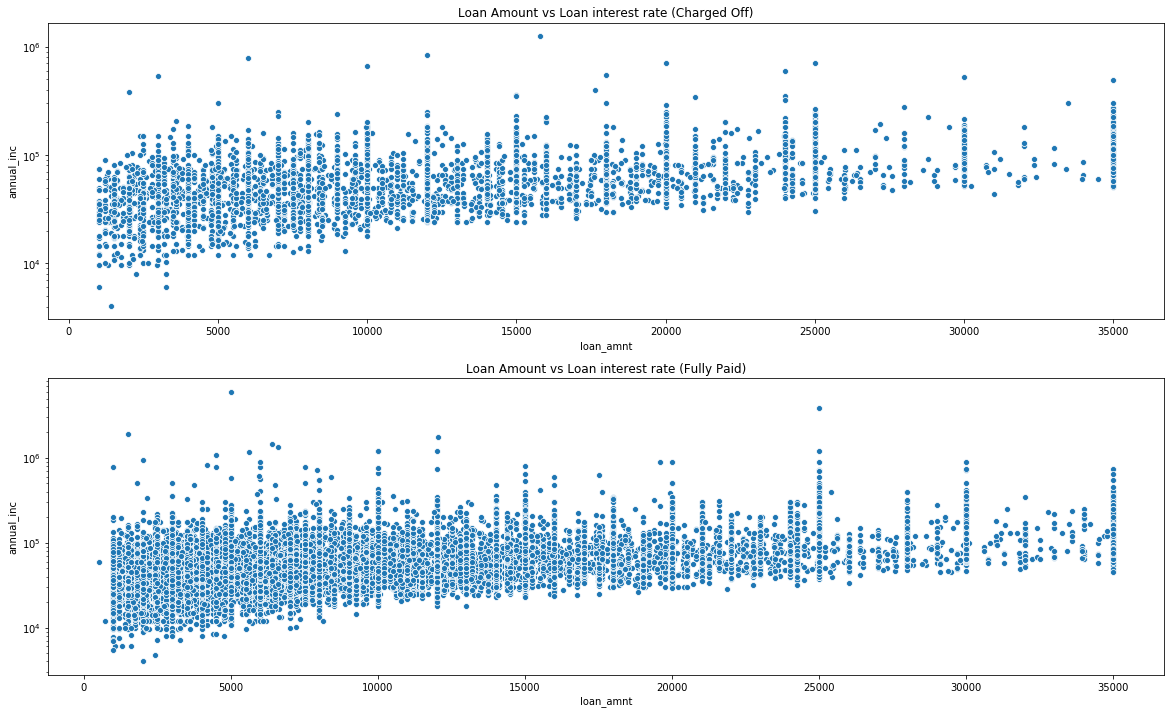

In [125]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_df[loan_df.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

Observation : Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope

Loan Amount vs DTI

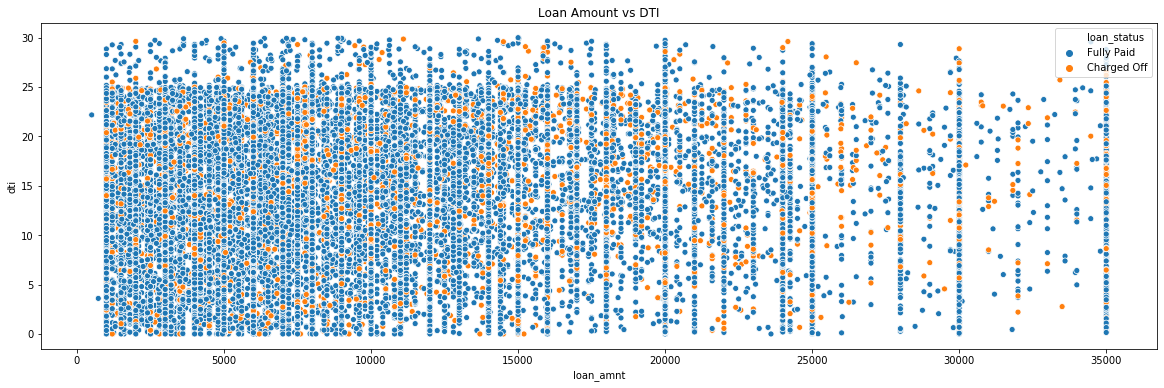

In [126]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

Observartion:No pattern found

Interest Rate vs DTI

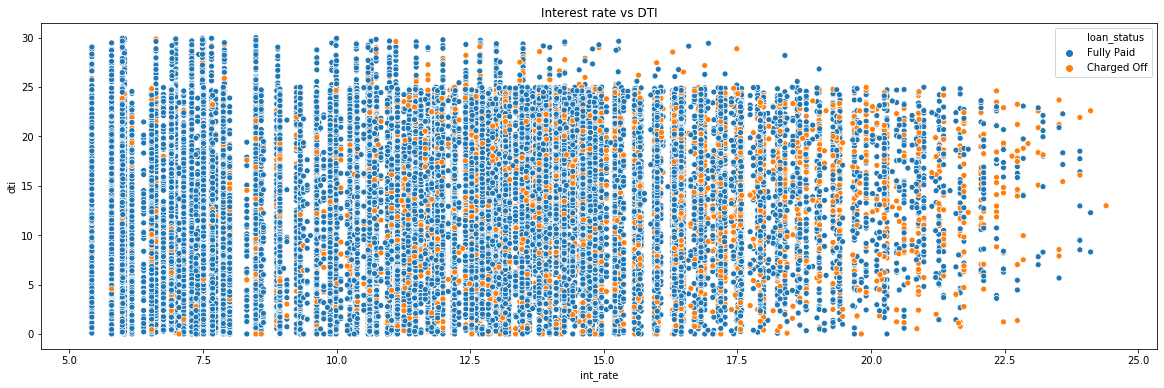

In [127]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan_df, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

Observation : when interest rates are high charged off loans are high

Correlation Matrix

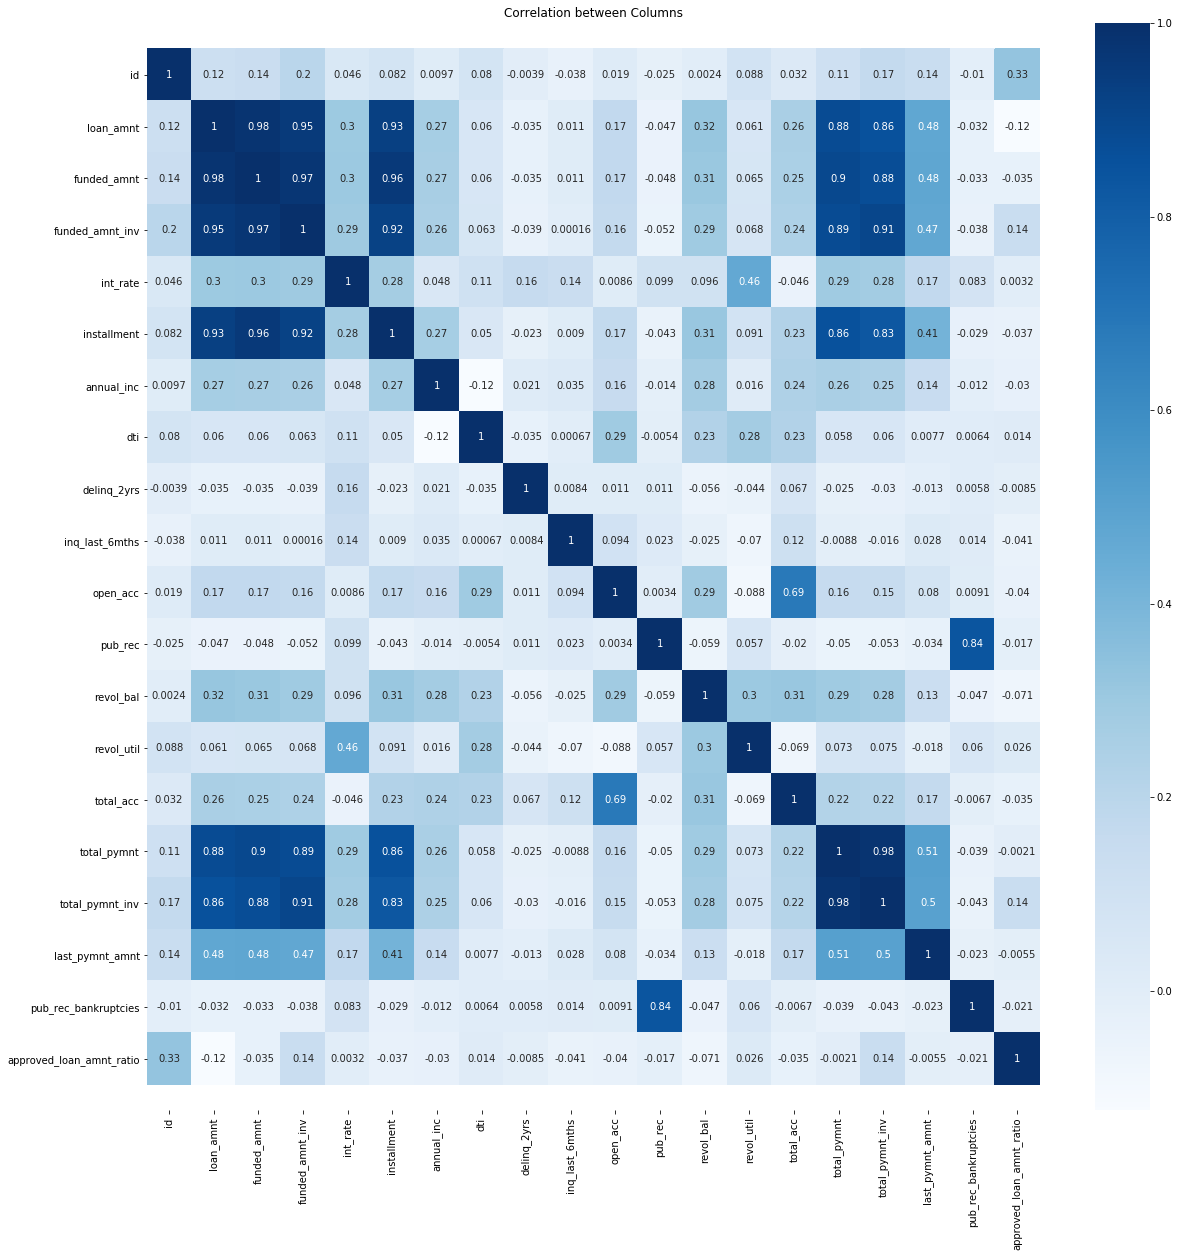

In [128]:
corr_matrix = loan_df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

Observation: public derogatory records colummn is highly (+ve) correlated with public bankruptcies records and Interest rates are high for people with high revol utilisation.